<h1 style="text-align: center;">Classifiez automatiquement des biens de consommation</h1>

 Étude de faisabilité d'une classification automatique des produits par image

## 🎯 Objectif
Évaluer si une classification automatique des articles est **possible via l'analyse des images**, en appliquant des techniques **de vision par ordinateur** et **d'apprentissage profond**.

---

## 🔹 **Pipeline d'analyse**
### **1️ Prétraitement des images**
-  **Chargement et exploration des images.**
-  **Transformations d’image** :  
  - Conversion en **niveaux de gris**  
  - **Filtrage de bruit**  
  - **Augmentation de contraste**  

---

## 🔹 **Étape 3 : Étude avec des méthodes de traitement basiques**
 **Extraction des caractéristiques via des méthodes classiques** :
-  **Descripteurs de points clés** :
  - `SIFT` *(Scale-Invariant Feature Transform)*
  - `ORB` *(Oriented FAST and Rotated BRIEF)*
**SIFT, ORB et CNN sont des algorithmes utilisés en vision par ordinateur.**


 **Réduction de dimension pour la visualisation** :
- `PCA` *(Analyse en Composantes Principales)*
- `t-SNE` t-Distributed Stochastic Neighbor Embedding
- `UMAP`Uniform Manifold Approximation Projection

 **Comparaison avec les catégories réelles** :
- Visualisation des regroupements avec **couleurs des classes réelles**.
- **Segmentation automatique** avec `K-Means`
- **Évaluation de la qualité des clusters** :
  - `Adjusted Rand Index (ARI)`

---

## 🔹 **Étape 4 : Étude avec une technique avancée (Deep Learning)**
 **Extraction des features via des réseaux de neurones pré-entraînés** :
- **CNN (Transfer Learning)** avec :
  - `VGG16`

 **Réduction de dimension et clustering** :
- Projection des features CNN **en 2D** (`PCA`, `t-SNE`, `UMAP`)
- Segmentation avec `K-Means` avec score ARI 
- **Comparaison avec les méthodes basiques** pour mesurer le gain de performance.

**Évaluation et comparaison des performances** :
- Score ARI les regroupements obtenus.
- Comparaison entre **features classiques (SIFT / ORB) vs. CNN Transfer Learning**.

--




## 1. IMAGE_<span style="color:red">Prétraitement</span>

 Chargement et exploration des images.
🎨 Transformations d’image :
- Conversion en **niveaux de gris**
- Filtrage de **bruit**
- Augmentation de **contraste**

In [1]:
import time
import datetime

# Démarrer le chronomètre
start_time = time.time()

# Afficher l'heure de début
start_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"📌 Début du notebook : {start_datetime}")


📌 Début du notebook : 2025-02-25 13:40:39


#### 0. <span style="color:skyblue">Chargement des images</span> 

In [2]:
import os  # Importation du module os pour gérer les fichiers et dossiers

# Définition du chemin vers le dossier contenant les images
# Utilisation de r" pour éviter les erreurs avec les backslashes sous Windows
path = r"C:\Python311\Scripts\P6_Classifiez Automatiquement des biens de consommations\IMAGE\IMAGE"

# Vérifier si le dossier existe avant de tenter de lister son contenu
if os.path.exists(path):
    list_photos = os.listdir(path)  # Liste tous les fichiers "jpeg" dans le dossier IMAGE
    print(f"Nombre de fichiers dans '{path}' : {len(list_photos)}")  # Affiche le nombre total de fichiers type image
else:
    print("Le dossier spécifié n'existe pas !")  # Message d'erreur si le dossier est introuvable

# Connaître l'emplacement du fichier référent à la base de données flikpart
# Obtenir le répertoire courant
current_directory = os.getcwd()

# Afficher le répertoire courant
print(f"Répertoire courant : {current_directory}")


Nombre de fichiers dans 'C:\Python311\Scripts\P6_Classifiez Automatiquement des biens de consommations\IMAGE\IMAGE' : 1051
Répertoire courant : C:\Python311\Scripts\P6_Classifiez Automatiquement des biens de consommations\IMAGE


#### 1. <span style="color:skyblue">Attribuer les catgories aux images grâce à la base de données</span> 

In [3]:
import pandas as pd
# Charger et afficher la base de donnéé flikpart
pictorial_dataset = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")
pictorial_dataset.head(2)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   
1  No rating available  No rating available  Sathiyas   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...


- La colonne **"image"** contient le **nom du fichier JPG** qui correspond à **l'image du produit**
- La colonne **"product_category_tree"** contient la **catégorie des produits** par arboresence **(3 niveaux)**
- On recupère donc le **premier niveau** de la categorie du produit à partir de la colonne **"product_category_tree"**

                               product_category_tree    category_niv_0
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing 
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care 
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care 
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing 
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing 


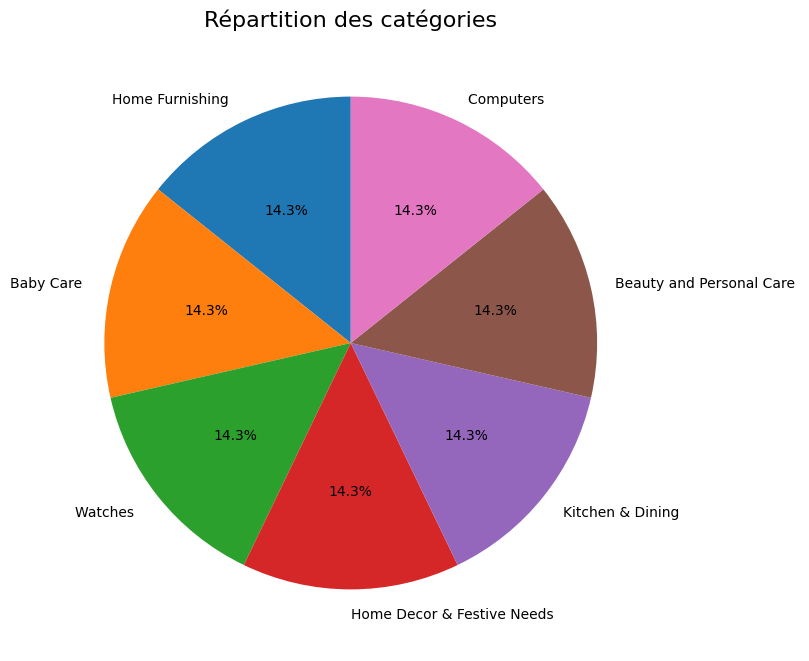

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour récupérer le premier niveau de l'arbre des catégories
def recup_cat_niveau_0(pictorial_dataset):
    """
    La fonction qui nous permet de récupérer le premier niveau de l'arboresence de la colonne catégorie.
    """
    if "product_category_tree" in pictorial_dataset.columns:
        pictorial_dataset["category_niv_0"] = pictorial_dataset["product_category_tree"].apply(
            lambda x: x.split('["')[1].split(">>")[0] if pd.notnull(x) else None
        )
    else:
        print("La colonne 'product_category_tree' est absente du dataset.")
    return pictorial_dataset

# Appliquer la fonction au dataset
pictorial_dataset = recup_cat_niveau_0(pictorial_dataset)

# Vérifier les premières lignes pour s'assurer que la colonne a bien été ajoutée
print(pictorial_dataset[["product_category_tree", "category_niv_0"]].head())

# Compter le nombre d'occurrences pour chaque catégorie de niveau 0
category_counts = pictorial_dataset['category_niv_0'].value_counts()

# Créer et afficher un diagramme circulaire
plt.figure(figsize=(10, 8))
plt.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',  # Afficher les pourcentages
    startangle=90,      # Rotation pour commencer à 12h
    textprops={'fontsize': 10}  # Taille du texte des étiquettes
)
plt.title("Répartition des catégories", fontsize=16)
plt.show()


In [5]:
# On compte et on affiche le nb. d'enregistrement par catégorie
pictorial_dataset.category_niv_0.value_counts()

category_niv_0
Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: count, dtype: int64

In [6]:
# On affiche la liste des colonne du dataset flikpart
pictorial_dataset.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'category_niv_0'],
      dtype='object')

In [7]:
# On affiche respectivement
# 1. Le nom des fichiers correspondants aux images
# 2. Les catégories correspondantes aux images
pictorial_dataset[["image","category_niv_0"]]	

image    category_niv_0
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing 
1     7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care 
2     64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care 
3     d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing 
4     6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing 
...                                    ...               ...
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg        Baby Care 
1046  fd6cbcc22efb6b761bd564c28928483c.jpg        Baby Care 
1047  5912e037d12774bb73a2048f35a00009.jpg        Baby Care 
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg        Baby Care 
1049  f2f027ad6a6df617c9f125173da71e44.jpg        Baby Care 

[1050 rows x 2 columns]

#### 2. <span style="color:skyblue">Création des labels des photos à partir du nom des images</span> 

In [8]:
# On affiche la liste des catégories de produits
pictorial_dataset["category_niv_0"].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [9]:
# Encodage des Labels Catégoriels avec LabelEncoder
# Ce script utilise `LabelEncoder` de `scikit-learn` pour convertir une colonne catégorielle 
# (`category_niv_0`) en valeurs numériques (`label`). Cela permet de préparer les données 
# pour des modèles de machine learning qui ne peuvent pas traiter directement des valeurs textuelles.

# Importation des bibliothèques
import pandas as pd  # Bibliothèque pour la manipulation des données
from sklearn.preprocessing import LabelEncoder  # Encodage des labels catégoriels

# Encodage de la colonne catégorielle
# On crée une instance de LabelEncoder
le = LabelEncoder()

# Transformation de la colonne "category_niv_0" en valeurs numériques
# La colonne label correspondra à l'encodage des catégories numériques
pictorial_dataset["label"] = le.fit_transform(pictorial_dataset["category_niv_0"])

# Affichage des valeurs **uniques** des labels encodés
# Cela permet de visualiser la correspondance entre les valeurs catégoriques et leurs codes numériques
print(pictorial_dataset[["label", "category_niv_0"]].drop_duplicates())

# Affichage des premières lignes du dataset encodé 
# Verrification de la présence de la colonne contenant les valeurs encodés
pictorial_dataset.head(3)


    label               category_niv_0
0       4             Home Furnishing 
1       0                   Baby Care 
5       6                     Watches 
36      3  Home Decor & Festive Needs 
37      5            Kitchen & Dining 
43      1    Beauty and Personal Care 
47      2                   Computers 


uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   

        product_rating       overall_rating     brand  \
0  No rating available  No rating available  Elegance   
1  No rating available  No rating available  Sathiyas   
2  No rating available  No rating available   Eurospa   

                              product_specifications    category_niv_0  label  
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing       4  
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care       0  
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care       0

In [10]:
# On verrifie l'activation de l'encodage
# On affiche sous forme de liste la liste des catégories de produits encodés
pictorial_dataset["label"].unique()

array([4, 0, 6, 3, 5, 1, 2])

In [11]:
# On renomme la colonne category_niv_0 par label_name
# Pour des futures opérations
pictorial_dataset.rename(columns={"category_niv_0": "label_name"}, inplace=True)

# On affiche la colonne label name
pictorial_dataset["label_name"]

0       Home Furnishing 
1             Baby Care 
2             Baby Care 
3       Home Furnishing 
4       Home Furnishing 
              ...       
1045          Baby Care 
1046          Baby Care 
1047          Baby Care 
1048          Baby Care 
1049          Baby Care 
Name: label_name, Length: 1050, dtype: object

In [12]:
import pandas as pd

# Trier le dataset par "label_name" pour garder l'ordre des catégories
pictorial_dataset = pictorial_dataset.sort_values(by=["label_name"]).reset_index(drop=True)

# Modifier "image_path" pour qu'il corresponde à "label_name + index"
pictorial_dataset["image_path"] = pictorial_dataset["label_name"] + pictorial_dataset.index.astype(str)

# Affichage des premières et dernières lignes pour vérifier
pictorial_dataset[["image_path","label_name","label"]].head()

image_path  label_name  label
0  Baby Care 0  Baby Care       0
1  Baby Care 1  Baby Care       0
2  Baby Care 2  Baby Care       0
3  Baby Care 3  Baby Care       0
4  Baby Care 4  Baby Care       0

In [13]:
# On effectue un test pour verrifier l'application de la labélisation est correcte
# On sélectionne une ligne du dataset par hasard
# On verrifie si la catgorie de produit est cohérente avec l'image du produit
pictorial_dataset[["image","image_path","label_name","label"]].iloc[625]

image         ff24511994fc459d04145231c8876d6c.jpg
image_path                     Home Furnishing 625
label_name                        Home Furnishing 
label                                            4
Name: 625, dtype: object

- Aprés ouverture du fichier, le test est correct le fichier jpg (ff24511994fc459d04145231c8876d6c.jpg) correspond bien à une image correspondante à la catégorie de produit **"Home Furnishing"**

#### 3. <span style="color:skyblue">Affichage d'exemples d'images par label</span> 

Baby Care 


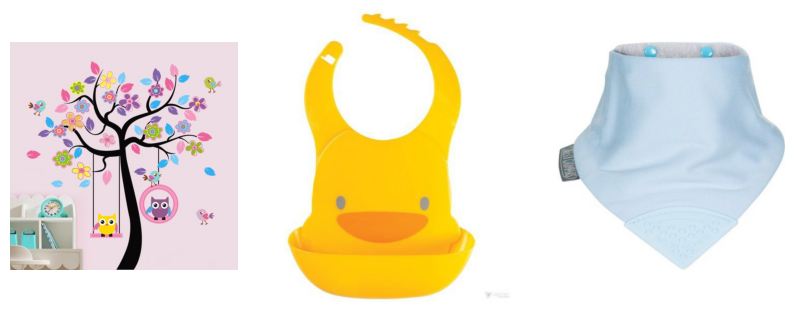

Beauty and Personal Care 


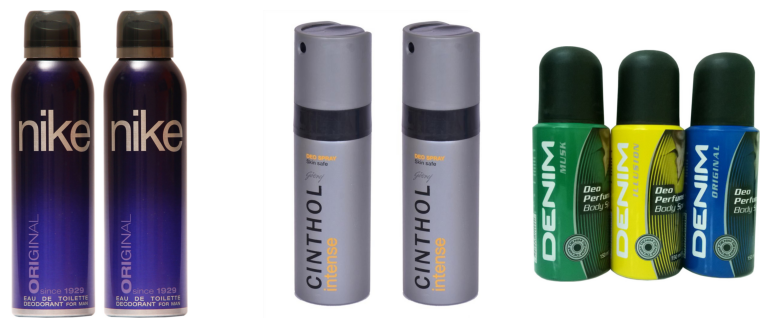

Computers 


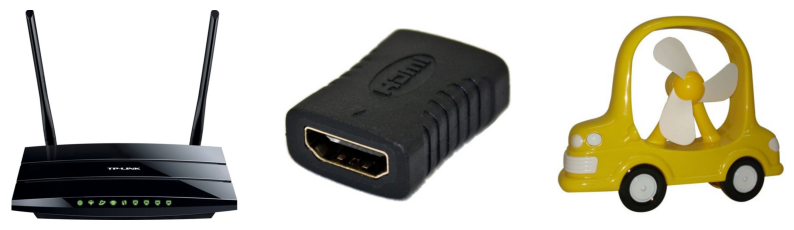

Home Decor & Festive Needs 


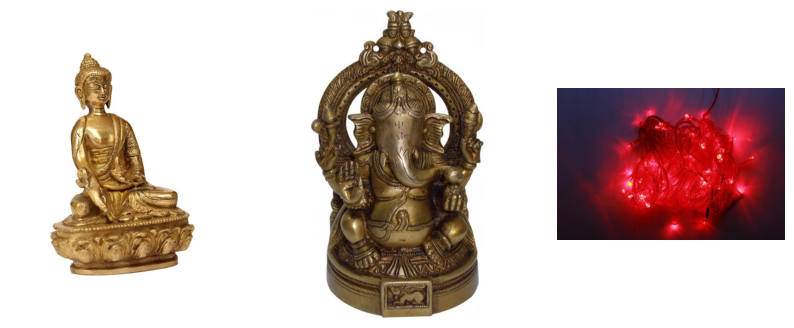

Home Furnishing 


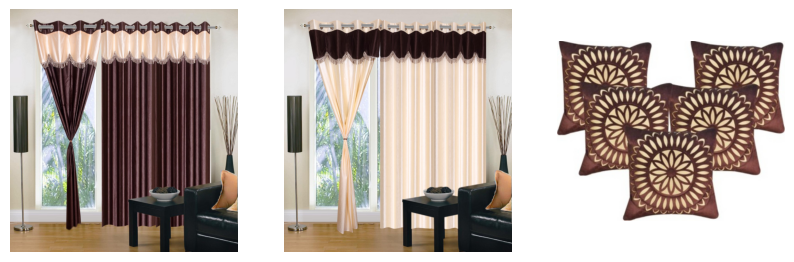

Kitchen & Dining 


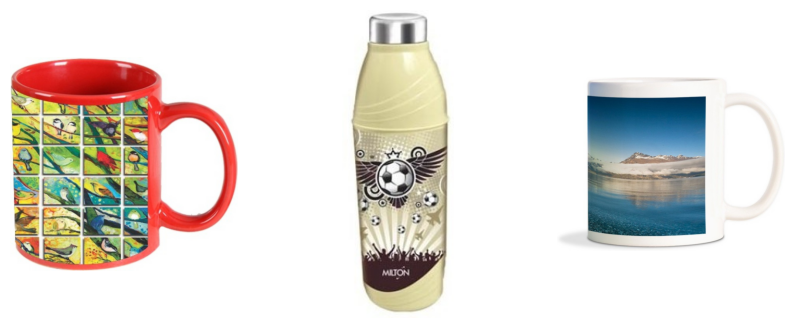

Watches 


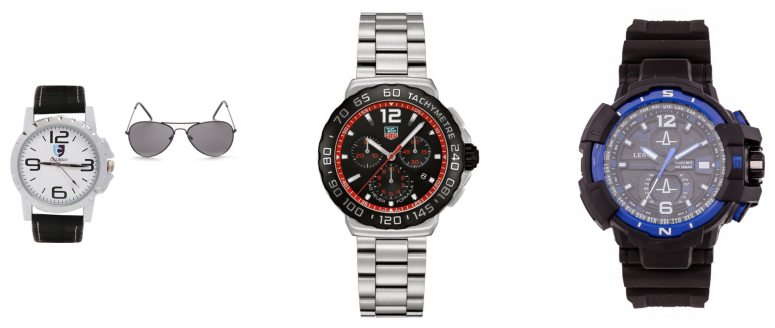

In [14]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Définition des catégories à afficher (extraites directement de pictorial_dataset)
list_labels = pictorial_dataset["label_name"].unique()  # Liste des catégories uniques

# Fonction pour récupérer les images d'une catégorie spécifique
def list_fct(category):
    return pictorial_dataset[pictorial_dataset["label_name"] == category]["image"].tolist()

# Définir le chemin vers les images 
# Ce chemin d'accès correspond au dossier ou sont stockés les images
path = r"C:\Python311\Scripts\P6_Classifiez Automatiquement des biens de consommations\IMAGE\IMAGE"

# Vérification si le dossier d'images existe
if not os.path.exists(path):
    print(f"Le dossier '{path}' n'existe pas. Vérifie le chemin.")
else:
    # Affichage des images par catégorie
    for category in list_labels:
        print(category)  # Afficher le nom de la catégorie
        
        # Liste des images pour cette catégorie
        list_images = list_fct(category)
        
        # Vérifier s'il y a assez d'images à afficher
        if len(list_images) < 3:
            print(f"Pas assez d'images pour {category}, affichage limité à {len(list_images)} images")
        
        # Création de la figure avec une ligne et 3 colonnes maximum
        plt.figure(figsize=(10, 4))
        
        for i in range(min(3, len(list_images))):  # Afficher max 3 images
            filename = os.path.join(path, list_images[i]) 
            if not os.path.exists(filename):  # Vérifier si le fichier existe
                print(f"Image non trouvée : {filename}")
                continue
            
            image = imread(filename)  # Lire l'image
            plt.subplot(1, 3, i + 1)
            plt.imshow(image)
            plt.axis("off")  # Supprimer les axes

        plt.show()  # Afficher l'image


## 2. IMAGE_Prétraitement - Feature Extraction <span style="color:orange">(Basique)</span> - Réduction _2d_ - Clustering K-Means + Évaluation ARI"

### <span style="color:orange">SIFT</span> | **<span style="color:orange">S</span>cale-<span style="color:orange">I</span>nvariant <span style="color:orange">F</span>eature <span style="color:orange">T</span>ransform**

#### 0. <span style="color:skyblue">Transformation d'image avec SIFT (Scale-Invariant Feature Transform)</span> 

- **SIFT** **_(Scale-Invariant Feature Transform)_** est une méthode de feature extraction utilisée en **vision par ordinateur** soit **Computer Vision**. 
- La méthode **détecte** et **décrit** des **points clés** dans une image en générant des descripteurs robustes aux changements d'échelle, de rotation et de luminosité.

| **Hyperparamètre**   | **Description**                                               | **Valeur par défaut**  |
|----------------------|---------------------------------------------------------------|------------------------|
| `nfeatures`         | Nombre maximal de points clés détectés                        | `0` (illimité)        |
| `nOctaveLayers`     | Nombre de couches par octave dans la pyramide de l’image     | `3`                    |
| `contrastThreshold` | Seuil de contraste pour éliminer les points clés faibles     | `0.04`                 |
| `edgeThreshold`     | Seuil pour éliminer les keypoints proches des bords          | `10`                   |
| `sigma`            | Sigma de la gaussienne utilisée pour la pyramide d’échelle   | `1.6`                  |


- **CLAHE** (**C**ontrast **L**imited **A**daptive **H**istogram **E**qualization) est une technique **d'amélioration du contraste** d'une image, particulièrement utile pour **améliorer la visibilité** des détails sans **amplifier excessivement le bruit**.

- L’espace couleur **Lab (CIE LAB)** est un espace **colorimétrique** perceptuellement uniforme, conçu pour **mieux correspondre à la vision humaine**. Il est souvent utilisé en **traitement d’image** car il permet de **manipuler la luminosité indépendamment** des couleurs.

- La **conversion en niveaux de gris** consiste à transformer **une image couleur** (RGB ou BGR) en une **image monochrome** contenant uniquement des nuances de gris, allant du **noir (0)** au **blanc (255)**.

##### A) **Determination et affichage des descripteurs SIFTS** | Scale-Invariant Feature Transform

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Étape 1 : Initialisation de SIFT
sift = cv2.SIFT_create()

# Étape 2 : Définition du chemin d'accès des images
path = r"C:\Python311\Scripts\P6_Classifiez Automatiquement des biens de consommations\IMAGE\IMAGE"

# Étape 3 : Chargement d'une image depuis le dataset
image_name = pictorial_dataset["image"].iloc[0]  # Prendre la première image
image_path = os.path.join(path, image_name)  # Construire le chemin complet

# Étape 4 : Chargement de l'image en couleur
image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Vérification que l'image a bien été chargée
if image_bgr is None:
    print(f"Erreur : Impossible de charger {image_path}. Vérifie le chemin et l'existence du fichier.")
else:
    # Conversion en espace LAB pour ajuster uniquement la luminosité (sans toucher aux couleurs)
    image_lab = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(image_lab)

    # Application de CLAHE avec un clipLimit plus faible pour ne pas trop modifier l’image
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_channel = clahe.apply(l_channel)

    # Reconstruction de l'image avec les couleurs originales
    image_lab = cv2.merge((l_channel, a_channel, b_channel))
    image_bgr = cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)

    # Conversion en niveaux de gris pour SIFT (sans affecter la couleur affichée)
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

    # Étape 5 : Détection des points clés et extraction des descripteurs
    kp, des = sift.detectAndCompute(image_gray, None)

    # Vérification que descripteurs existent avant d'afficher leur shape
    if des is not None:
        print(f"Nombre de points clés détectés : {len(kp)}")
        print(f"Shape des descripteurs : {des.shape}")  # Affichage des dimensions
        print("\nExemple de descripteurs SIFT :")
        print(des[:5])  # Afficher les 5 premiers descripteurs
    else:
        print("Aucun descripteur SIFT détecté.")

    # Étape 6 : Visualisation des points clés sur l'image couleur
    img_with_keypoints = cv2.drawKeypoints(image_bgr, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Affichage de l'image avec les points clés
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB)) 
    plt.title(f"SIFT Keypoints - {image_name}")
    plt.show()


**LES DIFFERENTES  ÉTAPES DE LA TRANSFORMATION DES IMAGES**

 **1. CHARGEMENT DE L'IMAGE**
- **cv2.imread()** → Charge une image depuis un fichier.

 **2. CONVERSION EN NIVEAUX DE GRIS**
- **cv2.IMREAD_GRAYSCALE** → Option (flag) qui permet à OpenCV de **charger directement l'image en niveaux de gris**, supprimant ainsi les informations de couleur.

 **3. FILTRAGE DU BRUIT**
- **cv2.GaussianBlur()** → Applique un **filtre gaussien** pour **réduire le bruit et lisser l'image**, ce qui facilite la détection des contours et l'extraction de caractéristiques.

 **4. AUGMENTATION DU CONTRASTE**
- **cv2.equalizeHist()** → Améliore le **contraste** d'une image en **niveaux de gris** en redistribuant les intensités des pixels via une **égalisation d’histogramme**, rendant les détails plus visibles.

**5. DÉTECTION DES POINTS CLÉS ET EXTRACTION DES DESCRIPTEURS**
- **cv2.SIFT_create()** → Initialise **SIFT** pour la détection des points clés.
- **cv2.detectAndCompute()** → Détecte les points clés et extrait leurs descripteurs.

**6. VISUALISATION DES POINTS CLÉS**
- **cv2.drawKeypoints()** → Dessine les **points clés détectés** sur l'image.

------------------------------------------------------------------------------------------------------------------------------------------------------

**📌 Tableau des fonctions utilisées dans OpenCV**

| **Fonction**              | **Explication** |
|---------------------------|----------------|
| `cv2.imread()`            | Charge une image depuis un **fichier**. |
| `cv2.IMREAD_GRAYSCALE`    | Charge une image en **niveaux de gris**. |
| `cv2.cvtColor()`          | Convertit une image d'un **format de couleur** à un autre (ex: BGR → Grayscale). |
| `cv2.GaussianBlur()`      | Applique un **flou gaussien** pour **réduire le bruit**. |
| `cv2.equalizeHist()`      | Applique une **égalisation d'histogramme** pour **améliorer le contraste**. |
| `cv2.createCLAHE()`       | Applique **CLAHE** (Contrast Limited Adaptive Histogram Equalization) pour **améliorer le contraste localement**. |
| `cv2.SIFT_create()`       | Initialise **SIFT** pour la **détection des points clés**. |
| `cv2.detectAndCompute()`  | Détecte les **points clés** et extrait leurs **descripteurs** avec SIFT. |
| `cv2.drawKeypoints()`     | Dessine les **points clés détectés** sur l'image. |

-------------------------------------------------------------------------------------------------------------------------------------------------------

**Astuce :**  
- Pour voir toutes les fonctions OpenCV disponibles, on peut executer **`help(cv2)`** en Python.  
- OpenCV est **très puissant** pour la **vision par ordinateur**, il offre **des outils avancés** pour la segmentation, la détection d'objets et plus encore.

                                                                **A PROPOS DU PREFIX Cv2:**

_Le préfixe **cv2** est utilisé pour appeler les fonctions de la bibliothèque **OpenCV (Open Source Computer Vision Library)** en Python_
_cv = Abréviation de _Computer Vision_
_cv2 = Nom du module OpenCV en Python (car il s'agit de la 2ᵉ version majeure d'OpenCV pour Python)._
_Il permet d'accéder aux fonctions de traitement d'image et de vision par ordinateur_


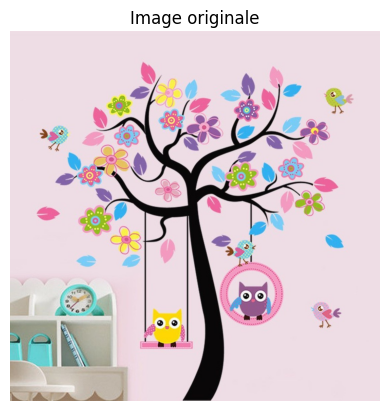

In [16]:
import cv2
import matplotlib.pyplot as plt
import os

# On charge et on affiche limage originale
image = cv2.imread(image_path)  # image_path doit contient le chemin vers l'image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Affichage de l'image en couleur
plt.title("Image originale")
plt.axis("off")
plt.show()


- **4877** → Nombre de points clés détectés dans l'image.  
  _Ces descripteurs sont utilisés pour la reconnaissance d’objets, le matching d’images et d’autres tâches de vision par ordinateur._

- **128** → Chaque point clé est décrit par un vecteur de **128 dimensions** (c'est la spécificité de SIFT).

- **Chaque ligne** du tableau des descripteurs correspond à **un point clé détecté**.

- **Chaque colonne** représente une **caractéristique** qui décrit la structure locale autour du point clé.

- **Les valeurs des descripteurs sont normalisées** afin d’être **robustes aux changements** :
  - 1. **Échelle** (taille de l’objet dans l’image)  
  - 2. **Rotation** (orientation de l’objet)  
  - 3. **Illumination** (changement de luminosité et contraste)

Chaque point clé détecté dans une image est décrit par un vecteur de **128 dimensions**.  
Cela signifie que chaque point clé est représenté par un tableau de **128 valeurs**, capturant les **caractéristiques locales de l'image**.

Exemple simplifié basé sur tes résultats (4877 points clés) :

| Point Clé | Dim 0 | Dim 1 | Dim 2 | ... | Dim 126 | Dim 127 |
|------------|-------|-------|-------|-----|---------|---------|
| 1          | 95    | 5     | 2     | ... | 0       | 0       |
| 2          | 3     | 0     | 0     | ... | 2       | 0       |
| 3          | 2     | 0     | 0     | ... | 8       | 3       |
| 4          | 206   | 43    | 0     | ... | 19      | 1       |
| 5          | 0     | 0     | 0     | ... | 1       | 3       |

- **Explication du tableau**:
- **Chaque ligne** représente **un point clé détecté** dans l'image.
- **Chaque colonne** représente **une dimension du descripteur** (nombre fixe de **128 dimensions** en **SIFT**).
- Il y a toujours **128 colonnes** car **SIFT encode chaque point clé avec 128 caractéristiques**.

-----------------------------------------------------------------------------------------------------------------------------------------

 **La Particularité des caractéristiques**:
Les caractéristiques des descripteurs SIFT sont basées sur les **histogrammes de gradients** et permettent de capturer les changements d'intensité lumineuse autour des points clés. Elles sont **invariantes** :
- 1. **À la rotation** (l’objet tourné sera toujours reconnu).  
- 2.  **À l'échelle** (l’objet plus grand ou plus petit reste détectable).  
- 3. **Aux changements de luminosité** (les contrastes sont pris en compte plutôt que les valeurs absolues).

-----------------------------------------------------------------------------------------------------------------------------------------

 **Interprétation des valeurs**
- **95** → Changement d’intensité modéré (zone texturée, coin).  
- **3** → Zone homogène, peu de variations de gradient.  
- **206** → Changement d’intensité **très fort** (contour net, bord d’objet bien marqué).  
- **0** → Aucune variation significative de luminosité sur cette dimension.  
- **Plus la valeur est élevée, plus la zone présente un changement fort de luminosité** (ex : contour d’un objet).  

-----------------------------------------------------------------------------------------------------------------------------------------



##### B) Créations des descripteurs SIFTS de chaque image

- Pour chaque image **passage en gris** et **equalisation**
- Création d'une **liste de descripteurs** par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser **les histogrammes par image**
- Création d'une **liste de descripteurs** pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer **les clusters de descripteurs**

In [17]:
import time
import cv2
import numpy as np
import os

# Initialisation de la détection SIFT
sift_keypoints = []
sift = cv2.SIFT_create(500)  # Détecte jusqu'à *500* points clés par image

# Définition du chemin des images
path = r"C:\Python311\Scripts\P6_Classifiez Automatiquement des biens de consommations\IMAGE\IMAGE"

# Mesure du temps d'exécution
temps1 = time.time()

# Parcours de toutes les images du dataset
for image_num, image_name in enumerate(pictorial_dataset["image"]):
    if image_num % 100 == 0:
        print(f"Traitement de l'image {image_num} : {image_name}")

    # Construction du chemin complet de l'image
    image_path = os.path.join(path, image_name)

    # Vérification si l'image existe avant de la charger
    if not os.path.exists(image_path):
        print(f" Image non trouvée : {image_path}")
        continue

    # Lecture de l'image en **niveaux de gris**
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # **Égalisation** de l'histogramme pour améliorer le contraste
    image = cv2.equalizeHist(image)

    # Détection **des points clés** et **extraction des descripteurs**
    kp, des = sift.detectAndCompute(image, None)

    # Stocker uniquement les descripteurs si détectés
    if des is not None:
        sift_keypoints.append(des)

# Conversion des descripteurs en tableau numpy
sift_keypoints_by_img = np.asarray(sift_keypoints, dtype=object)  # Liste descripteurs par image
sift_keypoints_all = np.concatenate(sift_keypoints, axis=0) if sift_keypoints else np.array([])  # Tous les descripteurs

# Affichage des résultats
print("\nNombre total de descripteurs :", sift_keypoints_all.shape)
duration = time.time() - temps1
print(f"Temps de traitement SIFT descriptor : {duration:.2f} secondes")


Traitement de l'image 0 : f2f027ad6a6df617c9f125173da71e44.jpg
Traitement de l'image 100 : 9ff54c12cc7ffd7c1a6724477b8fea2f.jpg
Traitement de l'image 200 : 91e22428c0dd8871288ba5dac35a7382.jpg
Traitement de l'image 300 : 4fe24e100a5fcc33cf6054ef101067ed.jpg
Traitement de l'image 400 : 9b805665a791f40e7946a73dcea17e35.jpg
Traitement de l'image 500 : 3b96a152c8fac4421fb67b6190584976.jpg
Traitement de l'image 600 : 678ebb5f6057dcc51948253c1b39b0b8.jpg
Traitement de l'image 700 : 414d2065e1aed847064bcf14538eabc8.jpg
Traitement de l'image 800 : ce02ab514e4c623dcf7acd7182a7762d.jpg
Traitement de l'image 900 : 920154acbe49d3202ed7d2ed2df1ea13.jpg
Traitement de l'image 1000 : 8284c10b2890ed53e17de5cfc33cdb96.jpg

Nombre total de descripteurs : (517351, 128)
Temps de traitement SIFT descriptor : 855.39 secondes


In [18]:
# On vérrifie que Scale Invariant Transform à traité toutes les images
print(f"Nombre total d'images traitées : {len(pictorial_dataset)}")

Nombre total d'images traitées : 1050


- IMAGE_Feature Extraction_Basique

                                       Transformation d'image **SIFT** (Scale-Invariant Feature Transform)

-   Détermination et affichage des descripteurs SIFT et dimension 128 fixes
- Chargement et conversion des images en **niveaux de gris**.
- **Filtrage du bruit** avec un **filtre gaussien**.
- **Égalisation d’histogramme** pour améliorer le contraste.
- Détection des **points clés** et extraction des **descripteurs SIFT**.
- Visualisation des points clés détectés sur l’image.

-  Création des descripteurs de chaque image
- Application de SIFT sur **toutes les images** du dataset.
- Extraction des **descripteurs pour chaque image**.
- **Stockage et affichage** du nombre total de descripteurs extraits.
- Analyse du **temps de traitement** et de la répartition des descripteurs.

**SIFT est utilisé comme méthode de feature extraction** pour **détecter** et **décrire** des régions importantes des images, tout en étant **robuste aux transformations géométriques et aux changements d'éclairage**. 


##### C) Créations des clusters de descripteurs

- 1. Clustering **SIFT** = Réduction des données + représentation compacte + accélération du traitement
- 2. **Bag of Visual Words** (BoVW) = Permet la classification et la recherche d'images
- 3. **MiniBatchKMeans** = Optimise le temps de calcul pour le clustering

In [ ]:
import numpy as np
import time
from sklearn import cluster

# Début du chronomètre pour mesurer le temps de traitement
temps1 = time.time()

# Détermination du nombre optimal de clusters (ici la racine carrée du nombre total de descripteurs)
k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("Nombre de clusters estimés :", k)
print("Création de", k, "clusters de descripteurs.")

# Clustering avec MiniBatchKMeans ( il est plus rapide que le KMeans classique)
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

# Calcul du temps de traitement
duration1 = time.time() - temps1
print("Temps de traitement MiniBatchKMeans :", "%15.2f" % duration1, "secondes")

# Affichage de quelques résultats
print("\n Résumé du clustering :")
print("Nombre total de descripteurs :", len(sift_keypoints_all))
print("Nombre de clusters utilisés :", k)
print("Temps de traitement total :", round(duration1, 2), "secondes")


Nombre de clusters estimés : 719
Création de 719 clusters de descripteurs...
Temps de traitement MiniBatchKMeans :           19.80 secondes

 Résumé du clustering :
Nombre total de descripteurs : 517351
Nombre de clusters utilisés : 719
Temps de traitement total : 19.8 secondes


- Les résultats de la création des clusters est cohérente et bien optimisés.
- Le **temps d'execution du Clustering est rapide (~12.00 sec)** grâce à l'utilisation de **MiniBatchKMeans**.
- Le nombre de **clusters est adapté (#719)** pour capturer la **diversité des descripteurs**.

##### D) Créations des features des images | <span style="color:red">Bag of Visual Words (BoVW)</span>
* Pour chaque image : 
   - **prédiction des numéros de cluster de chaque descripteur**
   - création d'un histogramme = **comptage pour chaque numéro de cluster** du nombre de descripteurs de l'image
   - Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

- L’objectif de ce code est de transformer **les descripteurs SIFT d’une image** en un **vecteur de caractéristiques utilisable** pour la **classification** ou **la reconnaissance d'images**.
- Cette méthode est connue sous le nom de **Bag of Visual Words (BoVW)**.

In [20]:
import numpy as np
import time

# Début du chronomètre pour mesurer le temps de création des histogrammes
temps1 = time.time()

def build_histogram(kmeans, des, image_num):
    """
    Fonction qui construit un histogramme de descripteurs pour une image donnée.
    
    - kmeans : modèle de clustering (MiniBatchKMeans)
    - des : descripteurs SIFT de l'image
    - image_num : index de l'image dans le dataset
    
    Retourne : un histogramme normalisé des descripteurs SIFT dans les clusters.
    """
    # Vérification si l'image a des descripteurs
    if len(des) == 0:
        print(f"Problème histogramme image {image_num} : aucun descripteur trouvé")
        return np.zeros(len(kmeans.cluster_centers_))  # Retourne un histogramme vide

    # Prédiction des clusters pour chaque descripteur SIFT de l'image
    res = kmeans.predict(des)
    
    # Initialisation de l'histogramme (1 case par cluster)
    hist = np.zeros(len(kmeans.cluster_centers_))
    
    # Remplissage de l'histogramme avec la fréquence des clusters (normalisée)
    for i in res:
        hist[i] += 1.0 / len(des)  # Normalisation pour éviter le biais lié au nombre de descripteurs

    return hist

# Création d'une liste pour stocker les histogrammes de toutes les images
hist_vectors = []

# Parcours de toutes les images pour générer leurs histogrammes
for i, image_desc in enumerate(sift_keypoints_by_img):
    if i % 100 == 0:
        print(f"Traitement de l'image {i}...")  # Le suivi du progrès

    hist = build_histogram(kmeans, image_desc, i)  # Calcul de l'histogramme
    hist_vectors.append(hist)  # Stockage de l'histogramme

# Conversion de la liste en une matrice NumPy (tableau final des features)
im_features = np.asarray(hist_vectors)

# Calcul du temps d'exécution total
duration1 = time.time() - temps1
print("\n Temps de création des histogrammes :", "%15.2f" % duration1, "secondes")

# Affichage du résumé des résultats
print("\n Résumé de la création des features :")
print(f"🔹 Nombre total d'images traitées : {len(sift_keypoints_by_img)}")
print(f"🔹 Dimensions de im_features : {im_features.shape}")  # (nb_images, nb_clusters)


Traitement de l'image 0...
Traitement de l'image 100...
Traitement de l'image 200...
Traitement de l'image 300...
Traitement de l'image 400...
Traitement de l'image 500...
Traitement de l'image 600...
Traitement de l'image 700...
Traitement de l'image 800...
Traitement de l'image 900...
Traitement de l'image 1000...

 Temps de création des histogrammes :            5.63 secondes

 Résumé de la création des features :
🔹 Nombre total d'images traitées : 1050
🔹 Dimensions de im_features : (1050, 719)


- **Chaque image** est maintenant représentée par un vecteur de **719 valeurs** (son histogramme de descripteurs).
- **Ces vecteurs** pourront être utilisés pour entraîner **un modèle de classification d'images**.
- Avant → Chaque point clé était un **vecteur de 128 dimensions**.
- Maintenant → Chaque image entière est un **vecteur de 719 dimensions**, qui représente combien de descripteurs sont présents dans chaque cluster.

C:\Users\saf168541\AppData\Local\Temp\ipykernel_6776\992454159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


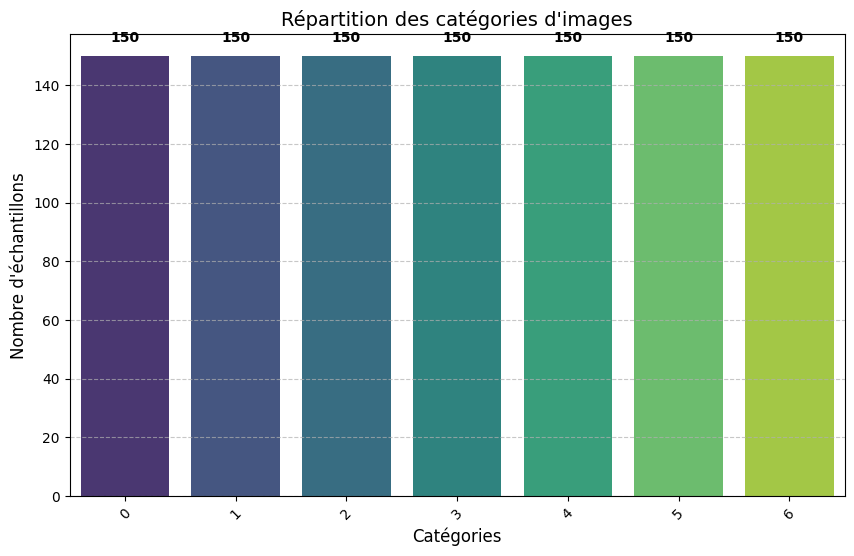

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Vérification de la présence de la colonne label"
assert 'pictorial_dataset' in globals(), "Erreur : `le dataset` n'est pas défini !"
assert 'label' in pictorial_dataset.columns, "Erreur : le dataset ne contient pas de colonne 'label'."

# Récupération des catégories et comptage des occurrences
category_counts = pictorial_dataset["label"].value_counts().sort_index()

# Création du graphique de répartition des catégories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Ajout des labels et titre
plt.xlabel("Catégories", fontsize=12)
plt.ylabel("Nombre d'échantillons", fontsize=12)
plt.title("Répartition des catégories d'images", fontsize=14)
plt.xticks(rotation=45) 
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Affichage du nombre d'échantillons sur les barres
for i, v in enumerate(category_counts.values):
    plt.text(i, v + 5, str(v), ha="center", fontsize=10, fontweight="bold")

plt.show()


#### 1. <span style="color:skyblue">Reduction _2d_ d'image + K-Means SIFT (Scale-Invariant Feature Transform)</span> 

                                                            A propos de notre feature SIFT **Scale Invariant Feature Transform** :
                                                            
- Elle s'intitule **`im_features `** et représente **l'ensemble des descripteurs SIFT** extraits sur **toutes les images**.
- Les points clés détectés pour chacune des images (**colonne #1**).
- Un total de **517.351 descripteurs**, correspondants aux **1050 images** du dataset (chaque ligne de la **colonne #1** représente un descripteur).
- Chaque descripteur est un vecteur de **128 dimensions**, ce qui est une spécificité de l’algorithme **SIFT** (**colonne #2**).
  
  / Performance de l'algorithme :
- Le temps de traitement total sur 1050 images est de **362,69 secondes**, soit **~6,04 minutes**.


##### 1.1 <span style="color:green">ACP | ACP (Analyse en Composantes Principales) + K-means + score ARI </span> 

- La réduction PCA **Principal Composant Analysis** permet de créer des features décorrélées entre elles, et de réduire leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)

 Les Hyperparamètres de PCA (Principal Component Analysis)

| **Hyperparamètre**  | **Description**                                               | **Valeur par défaut** |
|--------------------|--------------------------------------------------------------|----------------------|
| `n_components`    | Nombre de composantes principales conservées (doit être ≤ nombre de features). | `None` (autant que possible) |
| `copy`            | Copie les données avant transformation (`True`) ou modifie les données en place (`False`). | `True` |
| `whiten`          | Normalisation des composantes pour éviter des corrélations (`True` / `False`). | `False` |
| `svd_solver`      | Algorithme utilisé pour la décomposition SVD (`auto`, `full`, `arpack`, `randomized`). | `"auto"` |
| `tol`             | Seuil de tolérance pour l’arrêt des calculs (uniquement pour `arpack`). | `0.0` |
| `iterated_power`  | Nombre d'itérations de puissance pour l'algorithme `randomized`. | `"auto"` |
| `random_state`    | Graine aléatoire pour reproductibilité (utile pour `randomized`). | `None` |


Dimensions SIFT avant réduction PCA :  (1050, 719)

 **Résultats PCA avec n_components=0.99 (99% variance capturée) :**
Dimensions dataset après réduction PCA : (1050, 502)
Variance expliquée par PC1 : 6.11%
Variance expliquée par PC2 : 5.46%
Variance expliquée par les 8 premières composantes :
 [6.10617581 5.46190917 5.29048483 4.89112015 4.56498425 3.83590276
 2.73835453 2.38467747]
Variance cumulée :
 [ 6.10617581 11.56808498 16.85856982 21.74968997 26.31467422 30.15057698
 32.88893151 35.27360897]


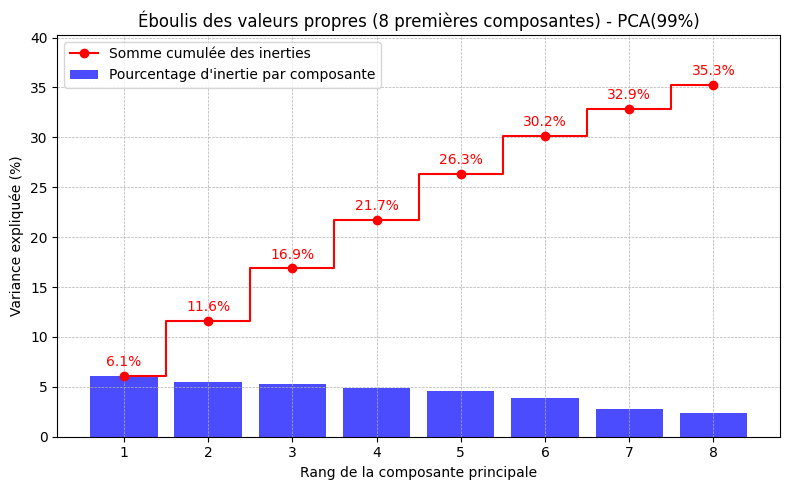

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition

# Affichage des dimensions avant PCA 
print("Dimensions SIFT avant réduction PCA : ", im_features.shape)

# Application de PCA avec 99% de variance capturée 
pca = decomposition.PCA(n_components=0.99, whiten=True)  # Capture 99% de la variance
feat_pca = pca.fit_transform(im_features)

# Récupération des valeurs de variance expliquée 
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Affichage des résultats
print("\n **Résultats PCA avec n_components=0.99 (99% variance capturée) :**")
print("Dimensions dataset après réduction PCA :", feat_pca.shape)  # Affiche combien de dimensions ont été retenues
print(f"Variance expliquée par PC1 : {explained_variance_ratio[0] * 100:.2f}%")
print(f"Variance expliquée par PC2 : {explained_variance_ratio[1] * 100:.2f}%")
print("Variance expliquée par les 8 premières composantes :\n", explained_variance_ratio[:8] * 100)  # Converti en pourcentage
print("Variance cumulée :\n", cumulative_variance[:8] * 100)  # Converti en pourcentage

# Éboulis des valeurs propres (Scree plot) 
num_components = min(8, len(explained_variance_ratio))  # Affichage limité aux 8 premières composantes seulement
x_values = range(1, num_components + 1)

plt.figure(figsize=(8, 5))

# Barres pour la variance expliquée par composante (multiplication par 100 pour affichage correct)
plt.bar(x_values, explained_variance_ratio[:num_components] * 100, color='b', alpha=0.7, label="Pourcentage d'inertie par composante")

# Courbe pour la variance cumulée (multiplication par 100 pour affichage correct)
cumulative_var_percentage = cumulative_variance[:num_components] * 100
plt.step(x_values, cumulative_var_percentage, where='mid', color='red', marker='o', linestyle='-', label="Somme cumulée des inerties")

# Ajout des valeurs de variance cumulée sur le graphique
for i, txt in enumerate(cumulative_var_percentage):
    plt.text(x_values[i], cumulative_var_percentage[i] + 1, f"{txt:.1f}%", ha='center', fontsize=10, color='red')

# Ajustements des axes et légendes
plt.xlabel("Rang de la composante principale")
plt.ylabel("Variance expliquée (%)")
plt.title(f"Éboulis des valeurs propres ({num_components} premières composantes) - PCA(99%)")
plt.xticks(x_values)  
plt.ylim(0, max(cumulative_var_percentage) + 5) 
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='best')
plt.tight_layout()

plt.show()


In [23]:
# On verrifie que les 8 composantes artificielles capturent au moins 99% de la variance
variance_expliquee = np.sum(pca.explained_variance_ratio_) * 100
print(f"PCA avec 50 composantes capture {variance_expliquee:.2f}% de la variance totale.")

PCA avec 50 composantes capture 99.00% de la variance totale.


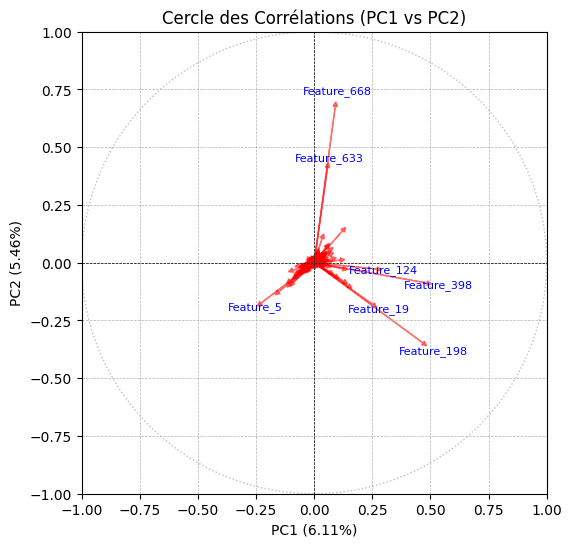

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction d'affichage du Cercle des Corrélations
def plot_correlation_circle(pca, components=(0, 1), feature_names=None, threshold=0.2):
    """
    Affiche le cercle des corrélations optimisé.

    Paramètres :
    - pca : objet PCA entraîné
    - components : tuple des indices des composantes principales à afficher
    - feature_names : noms des variables d'origine
    - threshold : seuil minimal pour afficher un label (évite la superposition excessive)
    """
    pc_x, pc_y = components
    eigenvectors = pca.components_
    explained_variance = pca.explained_variance_ratio_

    fig, ax = plt.subplots(figsize=(6, 6))
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='dotted', alpha=0.5)
    ax.add_patch(circle)

    # Calcul des normes des vecteurs
    norms = np.linalg.norm(eigenvectors[[pc_x, pc_y], :], axis=0)

    # Ajout des flèches pour les variables significatives
    for i in range(len(eigenvectors[0])):
        plt.arrow(0, 0, eigenvectors[pc_x, i], eigenvectors[pc_y, i], 
                  head_width=0.02, head_length=0.02, fc='red', ec='red', alpha=0.5)
        
        # Affichage du nom uniquement si la norme est au-dessus du seuil
        if feature_names is not None and norms[i] > threshold:
            plt.text(eigenvectors[pc_x, i] * 1.1, eigenvectors[pc_y, i] * 1.1, 
                     feature_names[i], fontsize=8, color='blue', ha='center', va='center')

    # Ajustements du graphique
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
    plt.xlabel(f"PC{pc_x+1} ({explained_variance[pc_x] * 100:.2f}%)")
    plt.ylabel(f"PC{pc_y+1} ({explained_variance[pc_y] * 100:.2f}%)")
    plt.title(f"Cercle des Corrélations (PC{pc_x+1} vs PC{pc_y+1})")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

# Génération des noms de features
feature_names = [f"Feature_{i}" for i in range(im_features.shape[1])]

# Affichage du cercle des corrélations
plot_correlation_circle(pca, components=(0, 1), feature_names=feature_names, threshold=0.2)

Dimensions dataset avant réduction PCA : (1050, 719)
Dimensions dataset après réduction PCA : (1050, 502)


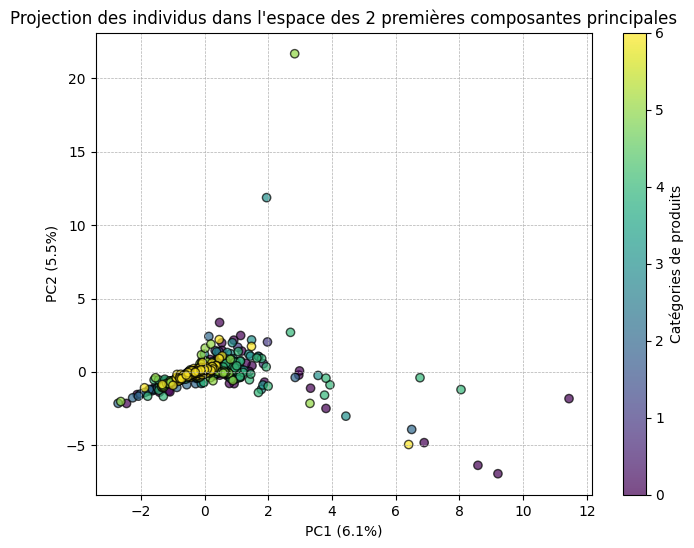

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage des dimensions avant et après PCA
print(f"Dimensions dataset avant réduction PCA : {im_features.shape}")
print(f"Dimensions dataset après réduction PCA : {feat_pca.shape}")

# Projection des individus
def plot_individuals_projection(pca_features, categories=None):
    """
    Affiche la projection des individus sur les 2 premières composantes principales.

    Paramètres :
    - pca_features : données transformées par la PCA (feat_pca)
    - categories : labels des individus (numériques), utilisés pour la colorisation des points
    """
    # Récupération des axes PC1 et PC2
    pc1 = pca_features[:, 0]
    pc2 = pca_features[:, 1]

    plt.figure(figsize=(8, 6))

    # Vérification si des catégories existent pour colorer les points
    if categories is not None:
        scatter = plt.scatter(pc1, pc2, c=categories, cmap="viridis", edgecolor='black', alpha=0.7)
        cbar = plt.colorbar(scatter)
        cbar.set_label("Catégories de produits")
    else:
        plt.scatter(pc1, pc2, color='blue', alpha=0.5, edgecolor='black')

    # Ajustements des axes et labels
    plt.xlabel(f"PC1 ({explained_variance_ratio[0] * 100:.1f}%)")
    plt.ylabel(f"PC2 ({explained_variance_ratio[1] * 100:.1f}%)")
    plt.title("Projection des individus dans l'espace des 2 premières composantes principales")
    plt.grid(True, linestyle='--', linewidth=0.5)

    plt.show()

# Exécution de la projection 
# Utilisation des valeurs de la colonne "label" pour colorer les points
labels = pictorial_dataset["label"].values  # Utilisation des labels numériques
plot_individuals_projection(feat_pca, categories=labels)


In [26]:
from sklearn.cluster import KMeans
n_clusters = len(np.unique(labels))  # Nombre de vraies catégories
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(feat_pca)

print("Clustering terminé !")

Clustering terminé !


In [27]:
# Verrification du nombre de cluster (nb. de catégorie)
print("Nombre unique de labels réels :", len(np.unique(labels)))
print("Nombre de clusters à définir:", n_clusters)

Nombre unique de labels réels : 7
Nombre de clusters à définir: 7


l'Indice de Rand Ajusté (ARI), est une métrique qui mesure la similarité entre deux partitions (groupements) d'un même ensemble de données.

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Nombre de clusters = Nombre de catégories réelles ici #7
n_clusters = len(np.unique(labels))

# Appliquer K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_pred = kmeans.fit_predict(feat_pca)

# Calcul du score ARI
ari_score = adjusted_rand_score(labels, labels_pred)
print(f"ARI : {ari_score:.4f}")

ARI : 0.0034


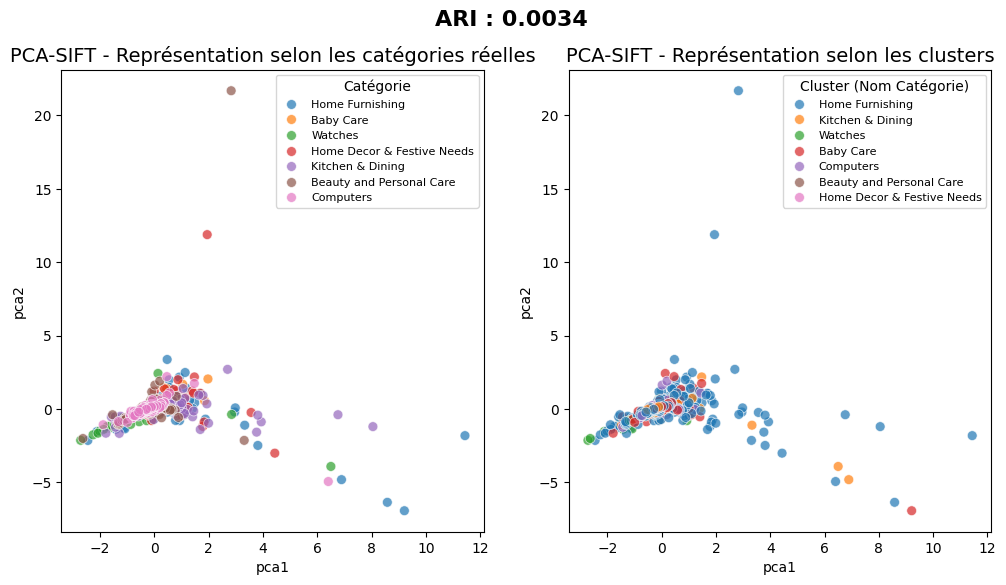

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définition des noms des catégories pour remplacer les indices
category_names = {
    0: "Home Furnishing",
    1: "Baby Care",
    2: "Watches",
    3: "Home Decor & Festive Needs",
    4: "Kitchen & Dining",
    5: "Beauty and Personal Care",
    6: "Computers"
}

# Création du DataFrame avec les données PCA et les labels
df_pca_sift = pd.DataFrame({
    'pca1': feat_pca[:, 0],  # Première composante principale
    'pca2': feat_pca[:, 1],  # Deuxième composante principale
    'true_label': labels,
    'cluster': labels_pred
})

# Remplacement des indices par les noms des catégories
df_pca_sift["true_label"] = df_pca_sift["true_label"].map(category_names)
df_pca_sift["cluster"] = df_pca_sift["cluster"].map(category_names)

# Affichage des catégories réelles avec noms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x="pca1", y="pca2", hue="true_label", data=df_pca_sift, palette="tab10", s=50, alpha=0.7)
plt.title("PCA-SIFT - Représentation selon les catégories réelles", fontsize=14)
plt.legend(title="Catégorie", fontsize=8)

# Affichage des clusters avec noms des catégories
plt.subplot(1, 2, 2)
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=df_pca_sift, palette="tab10", s=50, alpha=0.7)
plt.title("PCA-SIFT - Représentation selon les clusters", fontsize=14)
plt.legend(title="Cluster (Nom Catégorie)", fontsize=8)

# Ajout du score ARI
plt.suptitle(f"ARI : {ari_score:.4f}", fontsize=16, fontweight="bold")
plt.show()


- On calcul la matrice de confusion
- Une matrice de confusion à pour objectif de comparer les catégories **réelles** et les catégories **prédites** par K means
- Dans ce cas la variables des catégories **réelles** s'intitule : **true_label** intégrée dans le dataset **df_pca_sift**
- Dans ce cas la variables des catégories prédites par **K means** s'intitule :  **cluster** intégrée dans le dataset **df_pca_sift**


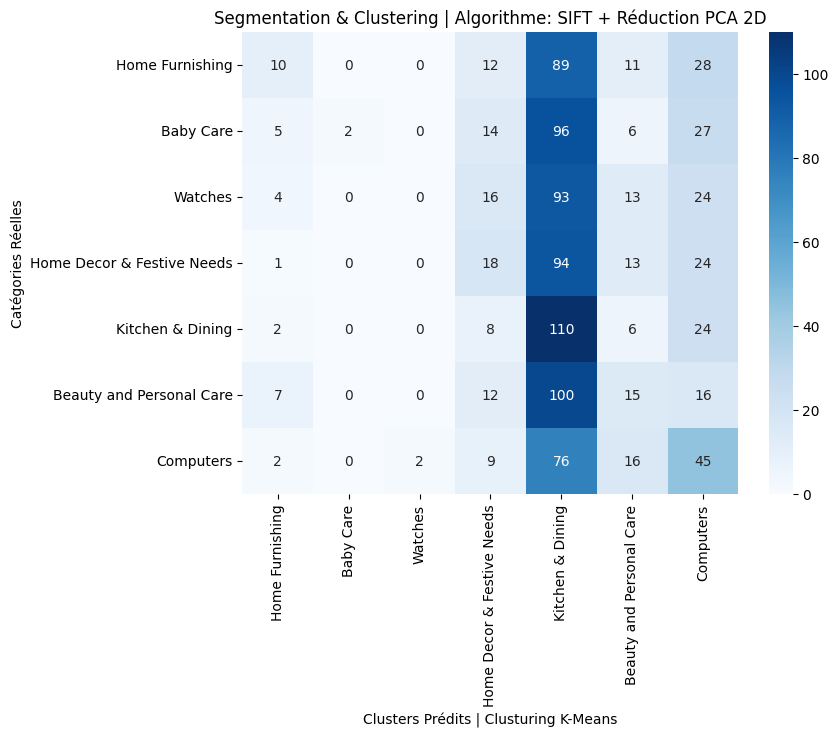

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# On s'assure que les labels réels et les clusters sont bien mappés aux indices numériques
df_pca_sift["true_label_num"] = df_pca_sift["true_label"].map({v: k for k, v in category_names.items()}).astype(int)
df_pca_sift["cluster_num"] = df_pca_sift["cluster"].map({v: k for k, v in category_names.items()}).astype(int)

# Création de la matrice de confusion 
conf_mat_raw = confusion_matrix(df_pca_sift["true_label_num"], df_pca_sift["cluster_num"])

# On trouve la meilleure correspondance entre les clusters K-Means et les vraies catégories
# linear_sum_assignment analyse la matrice de confusion
# Identifie quelle catégorie réelle est majoritaire dans chaque K
# Ré attribue les labels des clusters pour correspondre mieux aux catégories réelles
row_ind, col_ind = linear_sum_assignment(conf_mat_raw, maximize=True)

# Créer un mapping pour réaligner les clusters avec les labels réels
cluster_mapping = {old: new for old, new in zip(col_ind, row_ind)}

# On assigne cluster_num_vf avec cluster_num
# On effectue le mapping avec les catégories
df_pca_sift["cluster_num_vf"] = df_pca_sift["cluster_num"].map(cluster_mapping)

# Recalculer la matrice de confusion avec les clusters réalignés
conf_matrix_vf = confusion_matrix(df_pca_sift["true_label_num"], df_pca_sift["cluster_num_vf"])

# Affichage de la matrice sous forme de heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_vf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_names.values(), yticklabels=category_names.values())

plt.xlabel("Clusters Prédits | Clusturing K-Means")
plt.ylabel("Catégories Réelles")
plt.title("Segmentation & Clustering | Algorithme: SIFT + Réduction PCA 2D")
plt.show()

In [31]:
from sklearn.metrics import classification_report

# Création de la matrice de confusion entre catégories réelles et clusters prédits
conf_mat_temp = confusion_matrix(df_pca_sift["true_label_num"], df_pca_sift["cluster_num_vf"])

# Trouver la meilleure correspondance entre clusters et catégories réelles
# Pour chaque cluster, on identifie la classe réelle dominante
corresp = np.argmax(conf_mat_temp, axis=0)

# Affichage de la correspondance entre les clusters et les vraies classes
print("La correspondance des clusters : ", corresp)

# Transformation des prédictions après réalignement
# Chaque cluster est remplacé par la classe réelle majoritaire associée
cls_labels_transform = df_pca_sift["cluster_num_vf"].apply(lambda x: corresp[x])

# Calcul de la nouvelle matrice de confusion après transformation
conf_mat = confusion_matrix(df_pca_sift["true_label_num"], cls_labels_transform)

# Génération du rapport de classification pour évaluer le clustering K-Means avec les noms des classes
target_names = [category_names[i] for i in sorted(category_names.keys())]

print("\n Rapport de Classification :\n")
print(classification_report(df_pca_sift["true_label_num"], cls_labels_transform, target_names=target_names))



La correspondance des clusters :  [0 1 6 3 4 6 6]

 Rapport de Classification :

                            precision    recall  f1-score   support

           Home Furnishing       0.32      0.07      0.11       150
                 Baby Care       1.00      0.01      0.03       150
                   Watches       0.00      0.00      0.00       150
Home Decor & Festive Needs       0.20      0.12      0.15       150
          Kitchen & Dining       0.17      0.73      0.27       150
  Beauty and Personal Care       0.00      0.00      0.00       150
                 Computers       0.23      0.42      0.30       150

                  accuracy                           0.19      1050
                 macro avg       0.28      0.19      0.12      1050
              weighted avg       0.28      0.19      0.12      1050



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Definition des métriques de la matrice de confusion :
- **Precision** (Précision)
→ Proportion des éléments correctement classés parmi ceux prédit comme appartenant à une classe donnée.

- **Recall** (Rappel ou Sensibilité)
→ Proportion des éléments correctement classés parmi ceux qui appartiennent réellement à une classe donnée.

- **F1-score**
→ Moyenne harmonique entre la précision et le rappel, utile quand on veut un bon équilibre entre les deux.

- **Support**
→ Nombre total d’exemples réels appartenant à une classe donnée.
Interprétation : Plus le support est élevé, plus la classe est représentée dans le jeu de données.

1. **Précision** = Parmi les prédictions positives, combien sont correctes ?
2. **Rappel** = Parmi les vrais éléments d’une classe, combien sont bien détectés ?
3. **F1-score** = Moyenne équilibrée entre Précision et Rappel.
4. **Support** = Nombre d'éléments réels par classe.


##### 1.2 <span style="color:green">t-SNE ( t-Distributed Stochastic Neighbor Embedding) | K-means | _Linéaire_ </span> 

 Hyperparamètres de t-SNE (t-Distributed Stochastic Neighbor Embedding)

| **Hyperparamètre**  | **Description**                                              | **Valeur par défaut** |
|--------------------|-------------------------------------------------------------|----------------------|
| `n_components`    | Nombre de dimensions en sortie (généralement `2` ou `3`).   | `2` |
| `perplexity`      | Nombre de voisins considérés pour chaque point.              | `30.0` |
| `early_exaggeration` | Facteur d'expansion des distances en début d’optimisation. | `12.0` |
| `learning_rate`   | Vitesse d'apprentissage (entre `10` et `1000`).              | `200.0` |
| `n_iter`         | Nombre total d'itérations du gradient.                        | `1000` |
| `n_iter_without_progress` | Nombre d’itérations sans amélioration avant arrêt. | `300` |
| `min_grad_norm`  | Seuil minimal pour l’arrêt du gradient.                       | `1e-7` |
| `metric`         | Métrique de distance entre les points (`euclidean`, `cosine`, etc.). | `"euclidean"` |
| `init`          | Initialisation (`random` ou `pca`).                            | `"random"` |
| `random_state`  | Graine aléatoire pour reproductibilité.                        | `None` |
| `method`        | Algorithme d’optimisation (`barnes_hut` ou `exact`).           | `"barnes_hut"` |
| `angle`         | Paramètre d’accélération Barnes-Hut (`0.5` recommandé).        | `0.5` |
| `verbose`       | Niveau d’affichage (`0` = silence, `1` = affichage).           | `0` |
| `square_distances` | Utilise les distances au carré (`True`/`False`).            | `True` (`exact`), `False` (`barnes_hut`) |


In [32]:
from sklearn.manifold import TSNE

print("Dimensions dataset avant réduction t-SNE : ", feat_pca.shape)

# Réduction de dimension avec T-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=2000, learning_rate=50, random_state=6)
X_tsne_sift = tsne.fit_transform(feat_pca)

print("Dimensions dataset après réduction t-SNE : ", X_tsne_sift.shape)

Dimensions dataset avant réduction t-SNE :  (1050, 502)


C:\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Dimensions dataset après réduction t-SNE :  (1050, 2)


In [33]:
from sklearn.cluster import KMeans

n_clusters = len(np.unique(labels))  # Nombre de vraies catégories (#7)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tsne_sift)
print("Clustering terminé !")


Clustering terminé !


In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Nombre de clusters = Nombre de catégories réelles ici #7
n_clusters = len(np.unique(labels))

# Appliquer K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_pred_tsne_sift = kmeans.fit_predict(X_tsne_sift)

# Calcul du score ARI
ari_score = adjusted_rand_score(labels, labels_pred_tsne_sift)
print(f"ARI : {ari_score:.4f}")


ARI : 0.0165


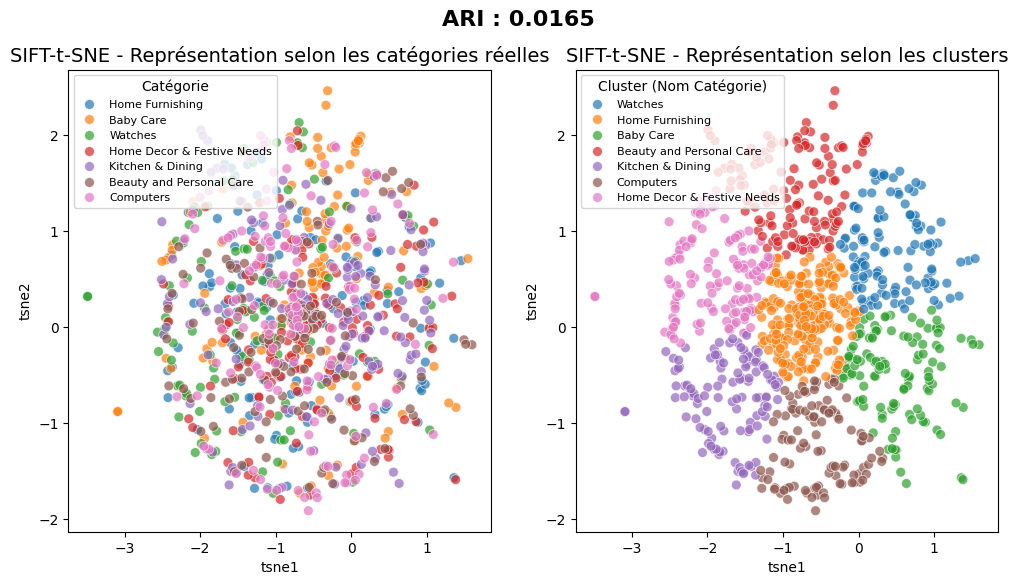

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définition des noms des catégories pour remplacer les indices
category_names = {
    0: "Home Furnishing",
    1: "Baby Care",
    2: "Watches",
    3: "Home Decor & Festive Needs",
    4: "Kitchen & Dining",
    5: "Beauty and Personal Care",
    6: "Computers"
}

# Création du DataFrame
df_tsne_sift = pd.DataFrame(X_tsne_sift, columns=['tsne1', 'tsne2'])
df_tsne_sift["true_label"] = labels
df_tsne_sift["cluster"] = labels_pred_tsne_sift

# Remplacement des indices par les noms des catégories pour les labels réels et clusters
df_tsne_sift["true_label"] = df_tsne_sift["true_label"].map(category_names)
df_tsne_sift["cluster"] = df_tsne_sift["cluster"].map(category_names)  # Ajout pour afficher les noms des clusters

# Affichage des catégories réelles avec noms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="tsne1", y="tsne2", hue="true_label", data=df_tsne_sift, palette="tab10", s=50, alpha=0.7)
plt.title("SIFT-t-SNE - Représentation selon les catégories réelles", fontsize=14)
plt.legend(title="Catégorie", fontsize=8)

# Affichage des clusters avec noms des catégories
plt.subplot(1, 2, 2)
sns.scatterplot(x="tsne1", y="tsne2", hue="cluster", data=df_tsne_sift, palette="tab10", s=50, alpha=0.7)
plt.title("SIFT-t-SNE - Représentation selon les clusters", fontsize=14)
plt.legend(title="Cluster (Nom Catégorie)", fontsize=8)

plt.suptitle(f"ARI : {ari_score:.4f}", fontsize=16, fontweight="bold")
plt.show()


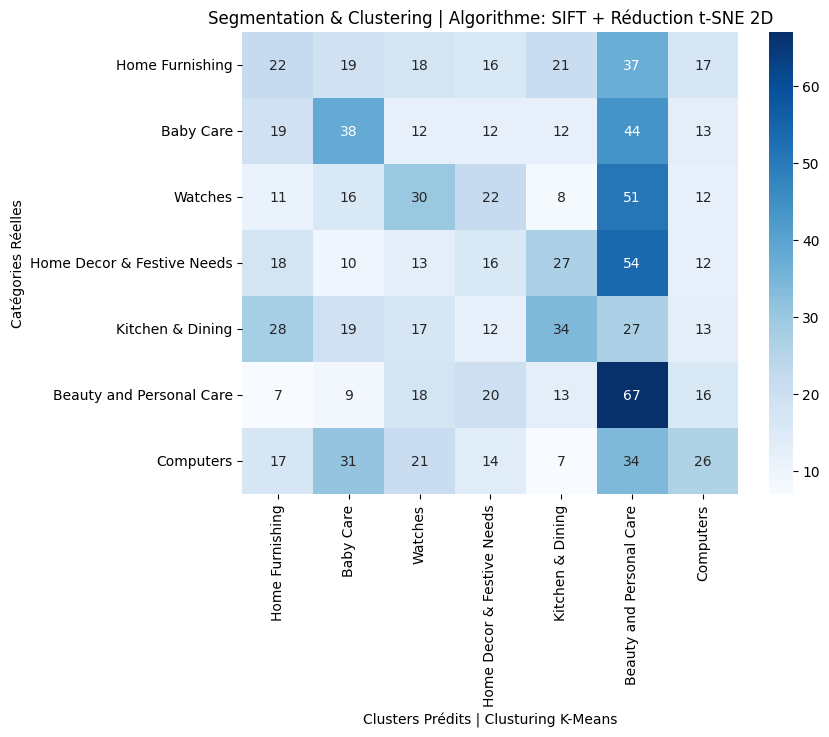

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# On s'assure que les labels réels et les clusters sont bien mappés aux indices numériques
df_tsne_sift["true_label_num"] = df_tsne_sift["true_label"].map({v: k for k, v in category_names.items()}).astype(int)
df_tsne_sift["cluster_num"] = df_tsne_sift["cluster"].map({v: k for k, v in category_names.items()}).astype(int)

# Création de la matrice de confusion 
conf_mat_raw = confusion_matrix(df_tsne_sift["true_label_num"], df_tsne_sift["cluster_num"])

# On trouve la meilleure correspondance entre les clusters K-Means et les vraies catégories
# linear_sum_assignment analyse la matrice de confusion
# Identifie quelle catégorie réelle est majoritaire dans chaque K
# Ré attribue les labels des clusters pour correspondre mieux aux catégories réelles
row_ind, col_ind = linear_sum_assignment(conf_mat_raw, maximize=True)

# Créer un mapping pour réaligner les clusters avec les labels réels
cluster_mapping = {old: new for old, new in zip(col_ind, row_ind)}

# On assigne cluster_num_vf avec cluster_num
# On effectue le mapping avec les catégories
df_tsne_sift["cluster_num_vf"] = df_tsne_sift["cluster_num"].map(cluster_mapping)

# Recalculer la matrice de confusion avec les clusters réalignés
conf_matrix_vf = confusion_matrix(df_tsne_sift["true_label_num"], df_tsne_sift["cluster_num_vf"])

# Affichage de la matrice sous forme de heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_vf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_names.values(), yticklabels=category_names.values())

plt.xlabel("Clusters Prédits | Clusturing K-Means")
plt.ylabel("Catégories Réelles")
plt.title("Segmentation & Clustering | Algorithme: SIFT + Réduction t-SNE 2D")
plt.show()

In [37]:
from sklearn.metrics import classification_report

# Création de la matrice de confusion entre catégories réelles et clusters prédits
conf_mat_temp = confusion_matrix(df_tsne_sift["true_label_num"], df_tsne_sift["cluster_num_vf"])

# Trouver la meilleure correspondance entre clusters et catégories réelles
# Pour chaque cluster, on identifie la classe réelle dominante
corresp = np.argmax(conf_mat_temp, axis=0)

# Affichage de la correspondance entre les clusters et les vraies classes
print("La correspondance des clusters : ", corresp)

# Transformation des prédictions après réalignement
# Chaque cluster est remplacé par la classe réelle majoritaire associée
cls_labels_transform = df_tsne_sift["cluster_num_vf"].apply(lambda x: corresp[x])

# Calcul de la nouvelle matrice de confusion après transformation
conf_mat = confusion_matrix(df_tsne_sift["true_label_num"], cls_labels_transform)

# Génération du rapport de classification pour évaluer le clustering K-Means avec les noms des classes
target_names = [category_names[i] for i in sorted(category_names.keys())]

print("\n Rapport de Classification :\n")
print(classification_report(df_tsne_sift["true_label_num"], cls_labels_transform, target_names=target_names))



La correspondance des clusters :  [4 1 2 2 4 5 6]

 Rapport de Classification :

                            precision    recall  f1-score   support

           Home Furnishing       0.00      0.00      0.00       150
                 Baby Care       0.27      0.25      0.26       150
                   Watches       0.22      0.35      0.27       150
Home Decor & Festive Needs       0.00      0.00      0.00       150
          Kitchen & Dining       0.25      0.41      0.31       150
  Beauty and Personal Care       0.21      0.45      0.29       150
                 Computers       0.24      0.17      0.20       150

                  accuracy                           0.23      1050
                 macro avg       0.17      0.23      0.19      1050
              weighted avg       0.17      0.23      0.19      1050



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Definition des métriques de la matrice de confusion :
- **Precision** (Précision)
→ Proportion des éléments correctement classés parmi ceux prédit comme appartenant à une classe donnée.

- **Recall** (Rappel ou Sensibilité)
→ Proportion des éléments correctement classés parmi ceux qui appartiennent réellement à une classe donnée.

- **F1-score**
→ Moyenne harmonique entre la précision et le rappel, utile quand on veut un bon équilibre entre les deux.

- **Support**
→ Nombre total d’exemples réels appartenant à une classe donnée.
Interprétation : Plus le support est élevé, plus la classe est représentée dans le jeu de données.

1. **Précision** = Parmi les prédictions positives, combien sont correctes ?
2. **Rappel** = Parmi les vrais éléments d’une classe, combien sont bien détectés ?
3. **F1-score** = Moyenne équilibrée entre Précision et Rappel.
4. **Support** = Nombre d'éléments réels par classe.

##### 1.3 <span style="color:green">UMAP|(Uniform Manifold Approximation and Projection) + K-means | _Linéaire_ </span> 

Hyperparamètres de UMAP (Uniform Manifold Approximation and Projection)

| **Hyperparamètre**  | **Description**                                             | **Valeur par défaut** |
|--------------------|-------------------------------------------------------------|----------------------|
| `n_neighbors`     | Nombre de voisins pris en compte pour définir la structure locale. | `15` |
| `n_components`    | Nombre de dimensions en sortie.                              | `2` |
| `metric`         | Métrique de distance (`euclidean`, `cosine`, etc.).           | `"euclidean"` |
| `output_metric`  | Métrique de distance après réduction (`euclidean`, `cosine`, etc.). | `"euclidean"` |
| `min_dist`       | Distance minimale entre les points projetés.                  | `0.1` |
| `spread`         | Contrôle l’étalement des clusters.                            | `1.0` |
| `set_op_mix_ratio` | Contrôle l’équilibre entre structure locale et globale (`0.0` = local, `1.0` = global). | `1.0` |
| `local_connectivity` | Nombre minimal de connexions locales par point.          | `1.0` |
| `repulsion_strength` | Force de répulsion entre points.                         | `1.0` |
| `negative_sample_rate` | Nombre d’échantillons négatifs pour équilibrer distances. | `5` |
| `init`           | Méthode d'initialisation (`spectral`, `random`).              | `"spectral"` |
| `transform_seed` | Graine aléatoire pour reproductibilité.                        | `42` |
| `low_memory`      | Réduction de la mémoire consommée (`True` ou `False`).      | `False` |
| `n_epochs`       | Nombre d'itérations du gradient (`None` pour auto).          | `None` |
| `alpha`          | Taux d’apprentissage de l’optimisation.                      | `1.0` |
| `gamma`          | Contrôle la force des liens inter-clusters.                  | `1.0` |
| `verbose`        | Niveau d’affichage (`True` = affiche, `False` = silencieux). | `False` |


In [38]:
import umap # Importation de la bibliothèque UMAP pour la réduction de dimensionnalité
import numpy as np # Importation de NumPy pour la manipulation de tableaux numériques

# Affichage des dimensions du dataset avant réduction
print("Dimensions dataset avant réduction UMAP : ", feat_pca.shape)

# Réduction de dimension avec UMAP (Uniform Manifold Approximation Projection)
umap_reducer = umap.UMAP(n_components=2, n_neighbors=40, min_dist=0.3, metric='euclidean', random_state=6)
X_umap_sift = umap_reducer.fit_transform(feat_pca)

umap_reducer = umap.UMAP(
    n_components=2,  # Nombre de dimensions en sortie après réduction
    n_neighbors=40,  # Nombre de voisins pris en compte pour préserver la structure locale
    min_dist=0.3,  # Distance minimale entre points après la réduction
    metric='euclidean',  # Type de métrique de distance utilisée (euclidienne ici)
    random_state=6  # Graine aléatoire pour garantir la reproductibilité
)

# Transformation des données avec UMAP
X_umap_sift = umap_reducer.fit_transform(feat_pca)  # Application de UMAP sur les données PCA

print("Dimensions dataset après réduction UMAP : ", X_umap_sift.shape)  # Vérification des dimensions après réduction


Dimensions dataset avant réduction UMAP :  (1050, 502)


C:\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dimensions dataset après réduction UMAP :  (1050, 2)


In [39]:
from sklearn.cluster import KMeans

n_clusters = len(np.unique(labels))  # Nombre de vraies catégories
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # Initialisation du modèle K-Means avec un nombre de clusters égal aux catégories réelles
clusters = kmeans.fit_predict(X_umap_sift)  # Apprentissage et prédiction des clusters sur les données réduites par UMAP
print("Clustering terminé !") # Msg de confirmation de la fin du clustering

Clustering terminé !


In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Nombre de clusters = Nombre de catégories réelles ici #7
n_clusters = len(np.unique(labels))

# Appliquer K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # Initialisation du modèle K-Means avec un nombre de clusters égal aux catégories réelles
labels_pred_umap_sift = kmeans.fit_predict(X_umap_sift)  # Apprentissage et prédiction des clusters sur les données réduites par UMAP

# Calcul du score ARI
ari_score = adjusted_rand_score(labels, labels_pred_umap_sift) # Évaluation du clustering en comparant avec les labels réels
print(f"ARI : {ari_score:.4f}") # Affichage du score ARI (qualité du clustering)


ARI : 0.4179


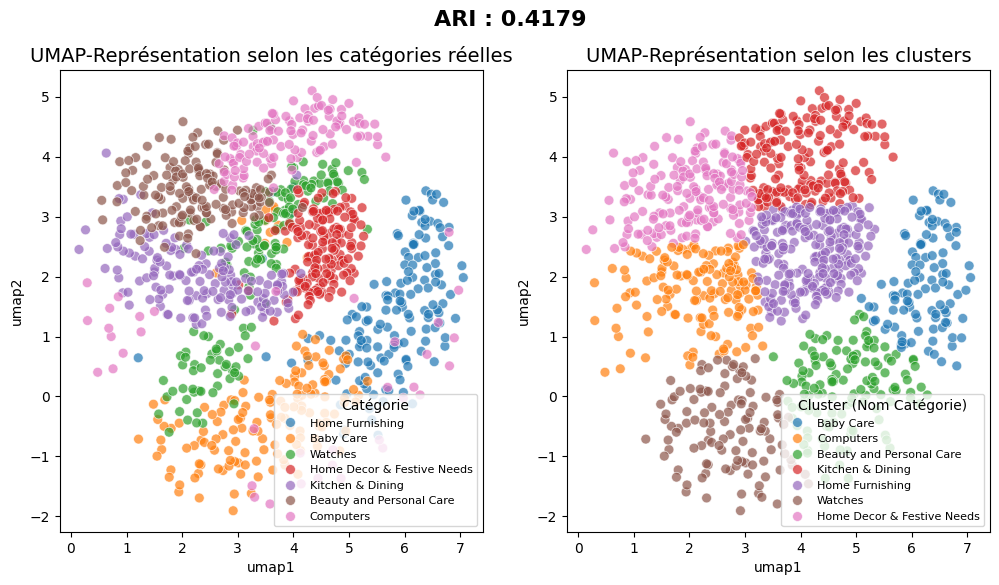

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définition des noms de catégories pour remplacer les indices
category_names = {
    0: "Home Furnishing",
    1: "Baby Care",
    2: "Watches",
    3: "Home Decor & Festive Needs",
    4: "Kitchen & Dining",
    5: "Beauty and Personal Care",
    6: "Computers"
}

# Création du DataFrame
df_umap_sift = pd.DataFrame(X_umap_sift, columns=['umap1', 'umap2'])
df_umap_sift["true_label"] = labels
df_umap_sift["cluster"] = labels_pred_umap_sift

# Remplacement des indices des labels réels et des clusters par les noms des catégories
df_umap_sift["true_label"] = df_umap_sift["true_label"].map(category_names)
df_umap_sift["cluster"] = df_umap_sift["cluster"].map(category_names)  # Ajout pour modifier la légende des clusters

# Affichage des catégories réelles avec noms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="umap1", y="umap2", hue="true_label", data=df_umap_sift, palette="tab10", s=50, alpha=0.7)
plt.title("UMAP-Représentation selon les catégories réelles", fontsize=14)
plt.legend(title="Catégorie", fontsize=8)

# Affichage des clusters avec les noms des catégories
plt.subplot(1, 2, 2)
sns.scatterplot(x="umap1", y="umap2", hue="cluster", data=df_umap_sift, palette="tab10", s=50, alpha=0.7)
plt.title("UMAP-Représentation selon les clusters", fontsize=14)
plt.legend(title="Cluster (Nom Catégorie)", fontsize=8)  # Mise à jour du titre

plt.suptitle(f"ARI : {ari_score:.4f}", fontsize=16, fontweight="bold")
plt.show()


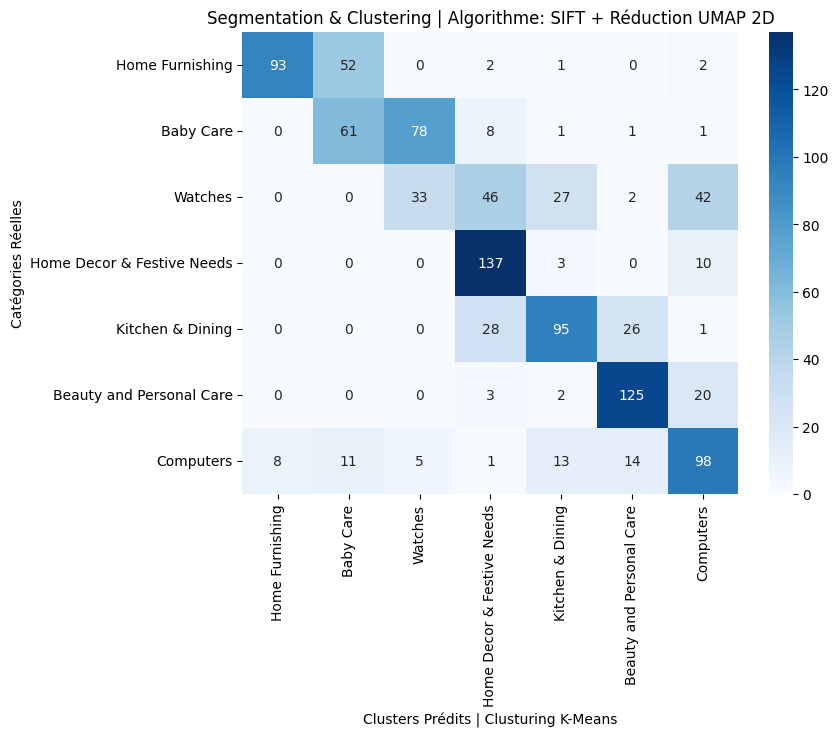

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# On s'assure que les labels réels et les clusters sont bien mappés aux indices numériques
df_umap_sift["true_label_num"] = df_umap_sift["true_label"].map({v: k for k, v in category_names.items()}).astype(int)
df_umap_sift["cluster_num"] = df_umap_sift["cluster"].map({v: k for k, v in category_names.items()}).astype(int)

# Création de la matrice de confusion 
conf_mat_raw = confusion_matrix(df_umap_sift["true_label_num"], df_umap_sift["cluster_num"])

# On trouve la meilleure correspondance entre les clusters K-Means et les vraies catégories
# linear_sum_assignment analyse la matrice de confusion
# Identifie quelle catégorie réelle est majoritaire dans chaque K
# Ré attribue les labels des clusters pour correspondre mieux aux catégories réelles
row_ind, col_ind = linear_sum_assignment(conf_mat_raw, maximize=True)

# Créer un mapping pour réaligner les clusters avec les labels réels
cluster_mapping = {old: new for old, new in zip(col_ind, row_ind)}

# On assigne cluster_num_vf avec cluster_num
# On effectue le mapping avec les catégories
df_umap_sift["cluster_num_vf"] = df_umap_sift["cluster_num"].map(cluster_mapping)

# Recalculer la matrice de confusion avec les clusters réalignés
conf_matrix_vf = confusion_matrix(df_umap_sift["true_label_num"], df_umap_sift["cluster_num_vf"])

# Affichage de la matrice sous forme de heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_vf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_names.values(), yticklabels=category_names.values())

plt.xlabel("Clusters Prédits | Clusturing K-Means")
plt.ylabel("Catégories Réelles")
plt.title("Segmentation & Clustering | Algorithme: SIFT + Réduction UMAP 2D")
plt.show()

In [43]:
from sklearn.metrics import classification_report

# Création de la matrice de confusion entre catégories réelles et clusters prédits
conf_mat_temp = confusion_matrix(df_umap_sift["true_label_num"], df_umap_sift["cluster_num_vf"])

# Trouver la meilleure correspondance entre clusters et catégories réelles
# Pour chaque cluster, on identifie la classe réelle dominante
corresp = np.argmax(conf_mat_temp, axis=0)

# Affichage de la correspondance entre les clusters et les vraies classes
print("La correspondance des clusters : ", corresp)

# Transformation des prédictions après réalignement
# Chaque cluster est remplacé par la classe réelle majoritaire associée
cls_labels_transform = df_umap_sift["cluster_num_vf"].apply(lambda x: corresp[x])

# Calcul de la nouvelle matrice de confusion après transformation
conf_mat = confusion_matrix(df_umap_sift["true_label_num"], cls_labels_transform)

# Génération du rapport de classification pour évaluer le clustering K-Means avec les noms des classes
target_names = [category_names[i] for i in sorted(category_names.keys())]

print("\n Rapport de Classification :\n")
print(classification_report(df_umap_sift["true_label_num"], cls_labels_transform, target_names=target_names))



La correspondance des clusters :  [0 1 1 3 4 5 6]

 Rapport de Classification :

                            precision    recall  f1-score   support

           Home Furnishing       0.92      0.62      0.74       150
                 Baby Care       0.58      0.93      0.71       150
                   Watches       0.00      0.00      0.00       150
Home Decor & Festive Needs       0.61      0.91      0.73       150
          Kitchen & Dining       0.67      0.63      0.65       150
  Beauty and Personal Care       0.74      0.83      0.79       150
                 Computers       0.56      0.65      0.60       150

                  accuracy                           0.65      1050
                 macro avg       0.58      0.65      0.60      1050
              weighted avg       0.58      0.65      0.60      1050



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Definition des métriques de la matrice de confusion :
- **Precision** (Précision)
→ Proportion des éléments correctement classés parmi ceux prédit comme appartenant à une classe donnée.

- **Recall** (Rappel ou Sensibilité)
→ Proportion des éléments correctement classés parmi ceux qui appartiennent réellement à une classe donnée.

- **F1-score**
→ Moyenne harmonique entre la précision et le rappel, utile quand on veut un bon équilibre entre les deux.

- **Support**
→ Nombre total d’exemples réels appartenant à une classe donnée.
Interprétation : Plus le support est élevé, plus la classe est représentée dans le jeu de données.

1. **Précision** = Parmi les prédictions positives, combien sont correctes ?
2. **Rappel** = Parmi les vrais éléments d’une classe, combien sont bien détectés ?
3. **F1-score** = Moyenne équilibrée entre Précision et Rappel.
4. **Support** = Nombre d'éléments réels par classe.


### <span style="color:orange">ORB</span> | <span style="color:orange">O</span>riented Fast and <span style="color:orange">R</span>otated<span style="color:orange"> B</span>RIEF

--------------------------------------------**DEFINITION ORB (Oriented FAST and Rotated BRIEF)**:----------------------------------
- C'est un **descripteur de caractéristiques** utilisé en vision par ordinateur pour **détecter** et **décrire** des **points d'intérêt** dans une image.

- Il a été introduit comme une alternative efficace et rapide aux descripteurs SIFT et SURF, tout en étant libre de droits (contrairement à SIFT et SURF qui sont brevetés).
  
- ORB combine deux algorithmes puissants :

**1**. Détection des points clés avec **FAST** (Features from Accelerated Segment Test)
**FAST** est un **algorithme rapide** de **étection de points d'intérêt** basé sur **l'intensité des pixels** autour d'un **point cible**.
ORB améliore **FAST** en lui ajoutant une orientation robuste pour compenser les rotations.
**Description des points clés** avec BRIEF (**B**inary **R**obust **I**ndependent **E**lementary **F**eatures)

**2**. BRIEF est un descripteur de points clés qui utilise des comparaisons de paires de pixels pour générer une représentation binaire.
ORB améliore BRIEF en le rendant invariant aux rotations grâce à un processus de rotation appelé Rotated **BRIEF**.

- Applications de ORB pour :
1. La Reconnaissance d'objets 🏷️
2. Le Suivi d'objets en vidéo 🎥
3. La Cartographie et SLAM (Simultaneous Localization and Mapping) 🗺️
4. La Recherche d’images similaires 🔎
ORB est largement utilisé dans les applications embarquées et mobiles en raison de son efficacité et de sa rapidité. 

---------------------------------------------------------LES HYPERPARAMETRES DE ORIENTED FAST AND BRIEF--------------------------

1. **Hyperparamètres de détection des points clés**
- **nfeatures** (Nombre de caractéristiques max)

- Définit combien de **points clés** ORB doit détecter dans une image.
_Valeur par défaut : 500_
Exemple : orb = cv2.ORB_create(nfeatures=1000)
scaleFactor (Facteur d’échelle pour le calcul multi-échelle)

**Facteur utilisé pour construire la pyramide d’échelle.**
- Une valeur 1.2 signifie que chaque niveau de la pyramide est 1.2 fois plus petit que le précédent.
- Valeur par défaut : 1.2
- nlevels (Nombre de niveaux dans la pyramide d’échelle)

**Définit le nombre de niveaux de la pyramide pour détecter des points clés à différentes échelles.**
- Plus de niveaux = meilleure détection sur des tailles variées, mais plus lent.
- Valeur par défaut : 8
- edgeThreshold (Seuil des bords de l'image)

**Définit la distance minimale entre les points clés détectés et les bords de l’image.**
- Si une caractéristique est détectée trop proche du bord, elle est ignorée.
- Valeur par défaut : 31
- fastThreshold (Seuil pour la détection FAST)

**Définit la sensibilité de l’algorithme FAST pour détecter un coin.**
- Une valeur élevée → Moins de coins détectés (plus strict).
- Une valeur faible → Plus de coins détectés (plus tolérant).
Valeur par défaut : 20

- 2. **Hyperparamètres descripteurs BRIEF**
- patchSize (Taille du patch autour des points clés)

**Définit la taille du patch extrait autour de chaque point clé pour générer le descripteur.**
- Une taille plus grande capture plus de détails, mais augmente le coût de calcul.
- Valeur par défaut : 31
- WTA_K (Nombre de comparaisons dans BRIEF)

**Définit le nombre de paires de pixels comparées pour générer un descripteur binaire.**
- Valeurs possibles : 2, 3, 4 (par défaut : 2)

3. Hyperparamètres liés à l’orientation et la correspondance
- scoreType (Méthode de scoring des points clés)

**Définit la méthode d’évaluation des points clés.**
- Valeurs possibles :
/ cv2.ORB_HARRIS_SCORE (par défaut) → Utilise la réponse Harris Corner Detector.
/ cv2.ORB_FAST_SCORE → Utilise la réponse FAST, plus rapide mais moins robuste.
- firstLevel (Premier niveau de la pyramide utilisé pour la détection des keypoints)

- Détermine à partir de quel niveau de la pyramide d’image ORB commence à détecter des caractéristiques.
Valeur par défaut : 0 (premier niveau).



| **Hyperparamètre**  | **Description**                                     | **Valeur par défaut**        |
|---------------------|----------------------------------------------------|-----------------------------|
| `nfeatures`        | Nombre max de points détectés                      | `500`                       |
| `scaleFactor`      | Échelle entre niveaux de la pyramide               | `1.2`                       |
| `nlevels`         | Nombre de niveaux de la pyramide                   | `8`                         |
| `edgeThreshold`    | Distance min aux bords avant suppression           | `31`                        |
| `fastThreshold`    | Sensibilité de FAST (plus bas = plus de points)    | `20`                        |
| `patchSize`        | Taille du patch utilisé pour générer BRIEF         | `31`                        |
| `WTA_K`            | Nombre de comparaisons dans BRIEF                  | `2`                         |
| `scoreType`        | Méthode de scoring des keypoints (Harris/FAST)     | `cv2.ORB_HARRIS_SCORE`      |
| `firstLevel`       | Premier niveau de la pyramide utilisé              | `0`                         |


In [44]:
# Importation des modules nécessaires
import os                      # Gestion des fichiers et chemins
import cv2                     # OpenCV pour le traitement d'images
import numpy as np             # Manipulation des tableaux numériques
import random                  # Sélection aléatoire d'images

# Définition du chemin des images
path = r"C:\Python311\Scripts\P6_Classifiez Automatiquement des biens de consommations\IMAGE\IMAGE"

# Utilisation des **1050 images complètes**
all_images = pictorial_dataset["image"].tolist()  # Liste de toutes les images (1050)
image_labels = pictorial_dataset.set_index("image")["label_name"]  # Associe chaque image à son label

# Initialisation de l'algorithme ORB
orb = cv2.ORB_create()
orb_features = []
valid_labels = []
fixed_size = 500  # Taille fixe des descripteurs

# Boucle sur chaque image (1050 images)
for image_name in all_images:
    image_path = os.path.join(path, image_name)
    
    # Lecture de l'image en niveaux de gris
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Erreur : Impossible de charger {image_name}")
        continue  # Passe à l'image suivante si elle est introuvable
    
    # Extraction des keypoints et descripteurs avec ORB
    keypoints, descriptors = orb.detectAndCompute(image, None)
    
    if descriptors is None:  # pas de keypoint détecté ?
        print(f"Aucune caractéristique détectée pour {image_name}, remplissage par des zéros.")
        descriptors = np.zeros((fixed_size,), dtype=np.uint8)  # Vecteur de zéros
    else:
        # Tri des keypoints et descripteurs par importance
        kp_desc = sorted(zip(keypoints, descriptors), key=lambda x: -x[0].response)
        sorted_keypoints, sorted_descriptors = zip(*kp_desc)
        
        # Transformation en vecteur 1D
        flat_descriptors = np.array(sorted_descriptors).flatten()
        
        # Ajustement de la taille au fixed_size
        if flat_descriptors.shape[0] < fixed_size:
            flat_descriptors = np.pad(flat_descriptors, (0, fixed_size - flat_descriptors.shape[0]), 'constant')
        else:
            flat_descriptors = flat_descriptors[:fixed_size]

        descriptors = flat_descriptors  # Assignation des descripteurs transformés
    
    # Ajout aux listes
    orb_features.append(descriptors)
    valid_labels.append(image_labels[image_name])

# Conversion en tableaux NumPy
orb_features = np.array(orb_features)
valid_labels = np.array(valid_labels)

# Vérification finale
print(f" Extraction terminée : {orb_features.shape[0]} images traitées avec succès.")
print(f" Taille finale de orb_features : {orb_features.shape}")
print(f" Nombre de labels : {valid_labels.shape}")


Aucune caractéristique détectée pour 9743e6d1c9f3180483825fe4d2e97836.jpg, remplissage par des zéros.
 Extraction terminée : 1050 images traitées avec succès.
 Taille finale de orb_features : (1050, 500)
 Nombre de labels : (1050,)


1. **orb_features** :
- C'est un tableau NumPy contenant, pour chaque image traitée, un vecteur de caractéristiques ORB de taille fixe (après flattening et padding/troncature).
- Ce vecteur représente l'ensemble des descripteurs extraits de l'image et pourra être utilisé pour d'autres tâches (classification, similarité, etc.).

2. **valid_labels** :
- C'est un second tableau NumPy qui stocke les labels associés à chaque image ayant généré des descripteurs.
- Il permet de garder une correspondance entre les vecteurs de caractéristiques et les catégories des images.

##### 1.1 <span style="color:green">ACP (Analyse en Composantes Principales) + K-means + score ARI</span> 

🎯 Hyperparamètres de PCA (Principal Component Analysis)

| **Hyperparamètre**  | **Description**                                               | **Valeur par défaut** |
|--------------------|--------------------------------------------------------------|----------------------|
| `n_components`    | Nombre de composantes principales conservées (doit être ≤ nombre de features). | `None` (autant que possible) |
| `copy`            | Copie les données avant transformation (`True`) ou modifie les données en place (`False`). | `True` |
| `whiten`          | Normalisation des composantes pour éviter des corrélations (`True` / `False`). | `False` |
| `svd_solver`      | Algorithme utilisé pour la décomposition SVD (`auto`, `full`, `arpack`, `randomized`). | `"auto"` |
| `tol`             | Seuil de tolérance pour l’arrêt des calculs (uniquement pour `arpack`). | `0.0` |
| `iterated_power`  | Nombre d'itérations de puissance pour l'algorithme `randomized`. | `"auto"` |
| `random_state`    | Graine aléatoire pour reproductibilité (utile pour `randomized`). | `None` |


In [45]:
# On affiche la dimension de Oriented Fast and Brief
print("Taille de orb_features :", orb_features.shape)

Taille de orb_features : (1050, 500)


In [46]:
from sklearn.decomposition import PCA

print("Dimensions dataset avant réduction PCA : ", orb_features.shape)
pca = PCA(n_components=0.99)  # Conserver 99% de la variance
feat_pca_orb = pca.fit_transform(orb_features)

print("Dimensions dataset après réduction PCA : ", feat_pca_orb.shape)


Dimensions dataset avant réduction PCA :  (1050, 500)
Dimensions dataset après réduction PCA :  (1050, 442)


In [47]:
from sklearn.cluster import KMeans

n_clusters = len(np.unique(labels))  # Nombre de vraies catégories
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(feat_pca_orb)

print("Clustering terminé !")

Clustering terminé !


In [48]:
# Verrification du nombre de cluster
print("Nombre unique de labels réels :", len(np.unique(labels)))
print("Nombre de clusters à définir:", n_clusters)

Nombre unique de labels réels : 7
Nombre de clusters à définir: 7


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Nombre de clusters = Nombre de catégories réelles ici #7
n_clusters = len(np.unique(labels))

# Appliquer K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_pred = kmeans.fit_predict(feat_pca_orb)

# Calcul du score ARI
ari_score = adjusted_rand_score(labels, labels_pred)
print(f"ARI : {ari_score:.4f}")


ARI : 0.0156


feat_pca_orb.shape : (1050, 442)
labels.shape : (1050,)
labels_pred.shape : (1050,)


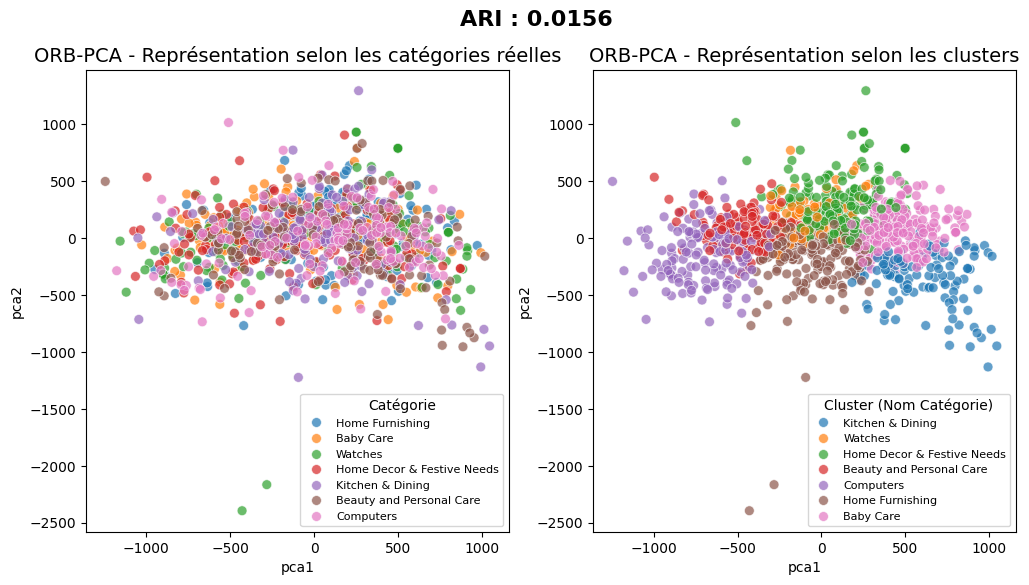

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définition des noms des catégories pour remplacer les indices
category_names = {
    0: "Home Furnishing",
    1: "Baby Care",
    2: "Watches",
    3: "Home Decor & Festive Needs",
    4: "Kitchen & Dining",
    5: "Beauty and Personal Care",
    6: "Computers"
}

# Vérification des dimensions avant de créer le DataFrame
print(f"feat_pca_orb.shape : {feat_pca_orb.shape}")
print(f"labels.shape : {labels.shape}")
print(f"labels_pred.shape : {labels_pred.shape}")

# Création du DataFrame avec les valeurs PCA
df_pca_orb = pd.DataFrame(feat_pca_orb[:, :2], columns=['pca1', 'pca2'])  # Prend uniquement les 2 premières dimensions

# Ajout des labels réels et des clusters prédits
df_pca_orb["true_label"] = labels
df_pca_orb["cluster"] = labels_pred

# Remplacement des indices par les noms des catégories pour les labels réels et clusters
df_pca_orb["true_label"] = df_pca_orb["true_label"].map(category_names)
df_pca_orb["cluster"] = df_pca_orb["cluster"].map(category_names)  # Ajout pour afficher les noms des clusters

# Affichage des catégories réelles avec noms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="pca1", y="pca2", hue="true_label", data=df_pca_orb, palette="tab10", s=50, alpha=0.7)
plt.title("ORB-PCA - Représentation selon les catégories réelles", fontsize=14)
plt.legend(title="Catégorie", fontsize=8)

# Affichage des clusters avec noms des catégories
plt.subplot(1, 2, 2)
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=df_pca_orb, palette="tab10", s=50, alpha=0.7)
plt.title("ORB-PCA - Représentation selon les clusters", fontsize=14)
plt.legend(title="Cluster (Nom Catégorie)", fontsize=8)

plt.suptitle(f"ARI : {ari_score:.4f}", fontsize=16, fontweight="bold")
plt.show()


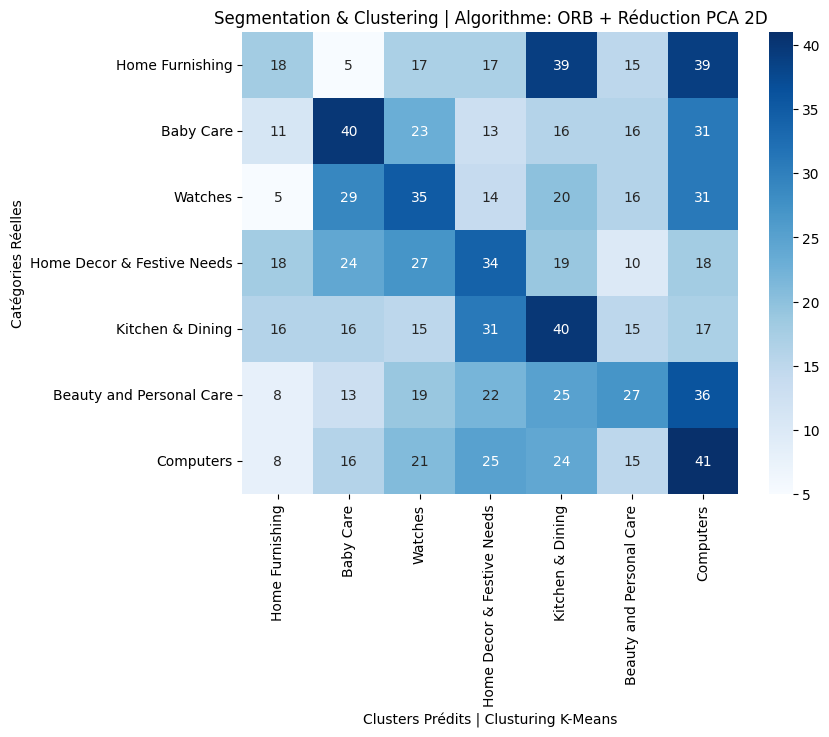

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# On s'assure que les labels réels et les clusters sont bien mappés aux indices numériques
df_pca_orb["true_label_num"] = df_pca_orb["true_label"].map({v: k for k, v in category_names.items()}).astype(int)
df_pca_orb["cluster_num"] = df_pca_orb["cluster"].map({v: k for k, v in category_names.items()}).astype(int)

# Création de la matrice de confusion 
conf_mat_raw = confusion_matrix(df_pca_orb["true_label_num"], df_pca_orb["cluster_num"])

# On trouve la meilleure correspondance entre les clusters K-Means et les vraies catégories
# linear_sum_assignment analyse la matrice de confusion
# Identifie quelle catégorie réelle est majoritaire dans chaque K
# Ré attribue les labels des clusters pour correspondre mieux aux catégories réelles
row_ind, col_ind = linear_sum_assignment(conf_mat_raw, maximize=True)

# Créer un mapping pour réaligner les clusters avec les labels réels
cluster_mapping = {old: new for old, new in zip(col_ind, row_ind)}

# On assigne cluster_num_vf avec cluster_num
# On effectue le mapping avec les catégories
df_pca_orb["cluster_num_vf"] = df_pca_orb["cluster_num"].map(cluster_mapping)

# Recalculer la matrice de confusion avec les clusters réalignés
conf_matrix_vf = confusion_matrix(df_pca_orb["true_label_num"], df_pca_orb["cluster_num_vf"])

# Affichage de la matrice sous forme de heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_vf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_names.values(), yticklabels=category_names.values())

plt.xlabel("Clusters Prédits | Clusturing K-Means")
plt.ylabel("Catégories Réelles")
plt.title("Segmentation & Clustering | Algorithme: ORB + Réduction PCA 2D")
plt.show()

In [52]:
from sklearn.metrics import classification_report

# Création de la matrice de confusion entre catégories réelles et clusters prédits
conf_mat_temp = confusion_matrix(df_pca_orb["true_label_num"], df_pca_orb["cluster_num_vf"])

# Trouver la meilleure correspondance entre clusters et catégories réelles
# Pour chaque cluster, on identifie la classe réelle dominante
corresp = np.argmax(conf_mat_temp, axis=0)

# Affichage de la correspondance entre les clusters et les vraies classes
print("La correspondance des clusters : ", corresp)

# Transformation des prédictions après réalignement
# Chaque cluster est remplacé par la classe réelle majoritaire associée
cls_labels_transform = df_pca_orb["cluster_num_vf"].apply(lambda x: corresp[x])

# Calcul de la nouvelle matrice de confusion après transformation
conf_mat = confusion_matrix(df_pca_orb["true_label_num"], cls_labels_transform)

# Génération du rapport de classification pour évaluer le clustering K-Means avec les noms des classes
target_names = [category_names[i] for i in sorted(category_names.keys())]

print("\n Rapport de Classification :\n")
print(classification_report(df_pca_orb["true_label_num"], cls_labels_transform, target_names=target_names))


La correspondance des clusters :  [0 1 2 3 4 5 6]

 Rapport de Classification :

                            precision    recall  f1-score   support

           Home Furnishing       0.21      0.12      0.15       150
                 Baby Care       0.28      0.27      0.27       150
                   Watches       0.22      0.23      0.23       150
Home Decor & Festive Needs       0.22      0.23      0.22       150
          Kitchen & Dining       0.22      0.27      0.24       150
  Beauty and Personal Care       0.24      0.18      0.20       150
                 Computers       0.19      0.27      0.23       150

                  accuracy                           0.22      1050
                 macro avg       0.23      0.22      0.22      1050
              weighted avg       0.23      0.22      0.22      1050



Definition des métriques de la matrice de confusion :
- **Precision** (Précision)
→ Proportion des éléments correctement classés parmi ceux prédit comme appartenant à une classe donnée.

- **Recall** (Rappel ou Sensibilité)
→ Proportion des éléments correctement classés parmi ceux qui appartiennent réellement à une classe donnée.

- **F1-score**
→ Moyenne harmonique entre la précision et le rappel, utile quand on veut un bon équilibre entre les deux.

- **Support**
→ Nombre total d’exemples réels appartenant à une classe donnée.
Interprétation : Plus le support est élevé, plus la classe est représentée dans le jeu de données.

1. **Précision** = Parmi les prédictions positives, combien sont correctes ?
2. **Rappel** = Parmi les vrais éléments d’une classe, combien sont bien détectés ?
3. **F1-score** = Moyenne équilibrée entre Précision et Rappel.
4. **Support** = Nombre d'éléments réels par classe.

##### 1.2 <span style="color:green">t-SNE (t-Distributed Stochastic Neighbor Embedding + K-means </span> 

🎯 Hyperparamètres de t-SNE (t-Distributed Stochastic Neighbor Embedding)

| **Hyperparamètre**  | **Description**                                              | **Valeur par défaut** |
|--------------------|-------------------------------------------------------------|----------------------|
| `n_components`    | Nombre de dimensions en sortie (généralement `2` ou `3`).   | `2` |
| `perplexity`      | Nombre de voisins considérés pour chaque point.              | `30.0` |
| `early_exaggeration` | Facteur d'expansion des distances en début d’optimisation. | `12.0` |
| `learning_rate`   | Vitesse d'apprentissage (entre `10` et `1000`).              | `200.0` |
| `n_iter`         | Nombre total d'itérations du gradient.                        | `1000` |
| `n_iter_without_progress` | Nombre d’itérations sans amélioration avant arrêt. | `300` |
| `min_grad_norm`  | Seuil minimal pour l’arrêt du gradient.                       | `1e-7` |
| `metric`         | Métrique de distance entre les points (`euclidean`, `cosine`, etc.). | `"euclidean"` |
| `init`          | Initialisation (`random` ou `pca`).                            | `"random"` |
| `random_state`  | Graine aléatoire pour reproductibilité.                        | `None` |
| `method`        | Algorithme d’optimisation (`barnes_hut` ou `exact`).           | `"barnes_hut"` |
| `angle`         | Paramètre d’accélération Barnes-Hut (`0.5` recommandé).        | `0.5` |
| `verbose`       | Niveau d’affichage (`0` = silence, `1` = affichage).           | `0` |
| `square_distances` | Utilise les distances au carré (`True`/`False`).            | `True` (`exact`), `False` (`barnes_hut`) |


In [53]:
from sklearn.manifold import TSNE

print("Dimensions dataset avant réduction t-SNE : ", feat_pca_orb.shape)

# Réduction de dimension avec T-SNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=2000, learning_rate=50, random_state=6)
X_tsne_orb = tsne.fit_transform(feat_pca_orb)

print("Dimensions dataset après réduction t-SNE : ", X_tsne_orb.shape)

Dimensions dataset avant réduction t-SNE :  (1050, 442)


C:\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Dimensions dataset après réduction t-SNE :  (1050, 2)


In [54]:
from sklearn.cluster import KMeans

n_clusters = len(np.unique(labels))  # Nombre de vraies catégories
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tsne_orb)
print("Clustering terminé !")


Clustering terminé !


In [55]:
# Verrification du nombre de cluster
print("Nombre unique de labels réels :", len(np.unique(labels)))
print("Nombre de clusters à définir:", n_clusters)

Nombre unique de labels réels : 7
Nombre de clusters à définir: 7


In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Nombre de clusters = Nombre de catégories réelles ici #7
n_clusters = len(np.unique(labels))

# Appliquer K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_pred_tsne_orb = kmeans.fit_predict(X_tsne_orb)

# Calcul du score ARI
ari_score = adjusted_rand_score(labels, labels_pred_tsne_orb)
print(f"ARI : {ari_score:.4f}")


ARI : 0.0120


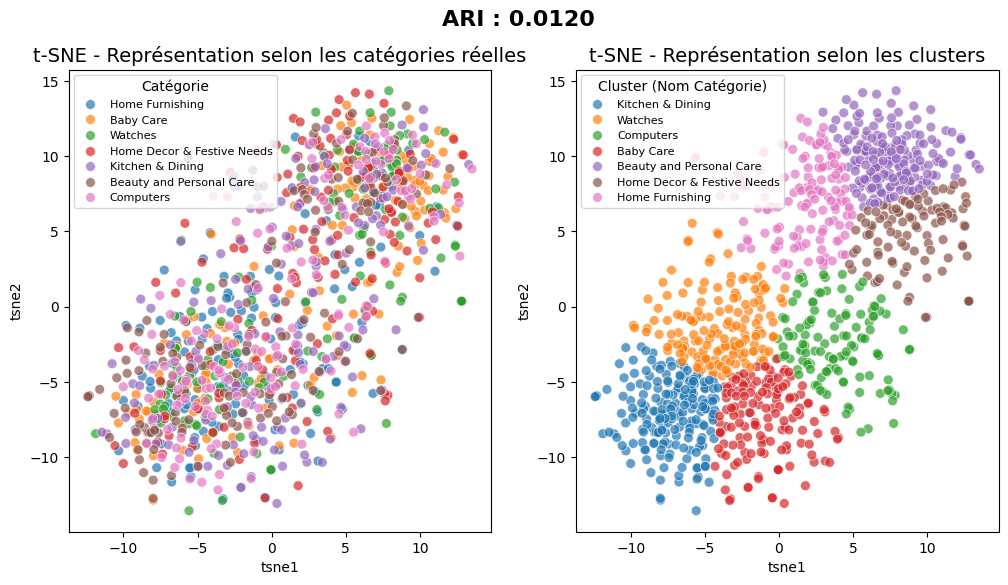

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définition des noms des catégories pour remplacer les indices
category_names = {
    0: "Home Furnishing",
    1: "Baby Care",
    2: "Watches",
    3: "Home Decor & Festive Needs",
    4: "Kitchen & Dining",
    5: "Beauty and Personal Care",
    6: "Computers"
}

# Création du DataFrame
df_tsne_orb = pd.DataFrame(X_tsne_orb, columns=['tsne1', 'tsne2'])
df_tsne_orb["true_label"] = labels
df_tsne_orb["cluster"] = labels_pred_tsne_orb

# Remplacement des indices par les noms des catégories pour les labels réels et clusters
df_tsne_orb["true_label"] = df_tsne_orb["true_label"].map(category_names)
df_tsne_orb["cluster"] = df_tsne_orb["cluster"].map(category_names)  # Ajout pour afficher les noms des clusters

# Affichage des catégories réelles avec noms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="tsne1", y="tsne2", hue="true_label", data=df_tsne_orb, palette="tab10", s=50, alpha=0.7)
plt.title("t-SNE - Représentation selon les catégories réelles", fontsize=14)
plt.legend(title="Catégorie", fontsize=8)

# Affichage des clusters avec noms des catégories
plt.subplot(1, 2, 2)
sns.scatterplot(x="tsne1", y="tsne2", hue="cluster", data=df_tsne_orb, palette="tab10", s=50, alpha=0.7)
plt.title("t-SNE - Représentation selon les clusters", fontsize=14)
plt.legend(title="Cluster (Nom Catégorie)", fontsize=8)

plt.suptitle(f"ARI : {ari_score:.4f}", fontsize=16, fontweight="bold")
plt.show()


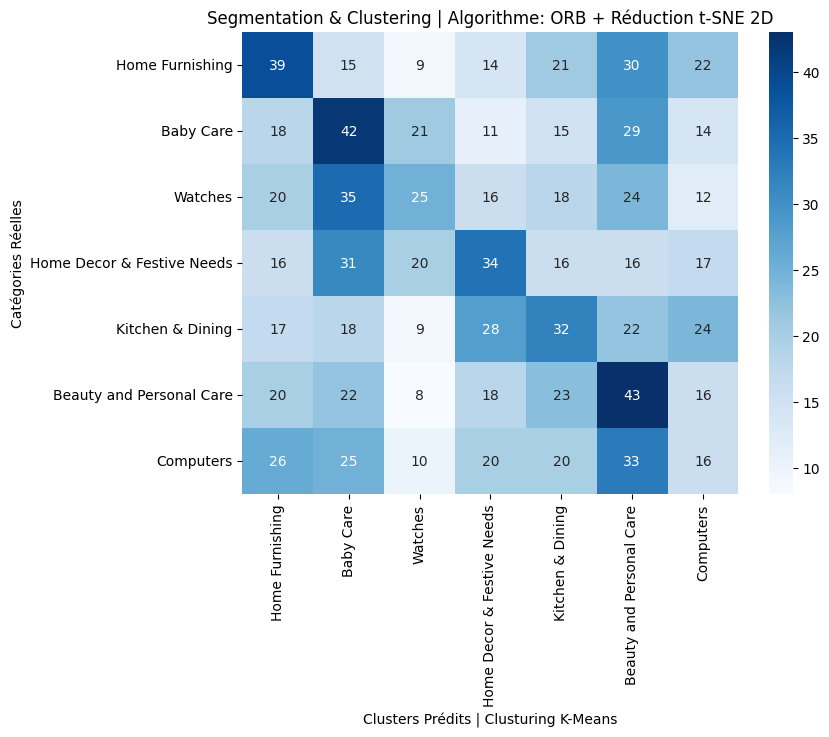

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# On s'assure que les labels réels et les clusters sont bien mappés aux indices numériques
df_tsne_orb["true_label_num"] = df_tsne_orb["true_label"].map({v: k for k, v in category_names.items()}).astype(int)
df_tsne_orb["cluster_num"] = df_tsne_orb["cluster"].map({v: k for k, v in category_names.items()}).astype(int)

# Création de la matrice de confusion 
conf_mat_raw = confusion_matrix(df_tsne_orb["true_label_num"], df_tsne_orb["cluster_num"])

# On trouve la meilleure correspondance entre les clusters K-Means et les vraies catégories
# linear_sum_assignment analyse la matrice de confusion
# Identifie quelle catégorie réelle est majoritaire dans chaque K
# Ré attribue les labels des clusters pour correspondre mieux aux catégories réelles
row_ind, col_ind = linear_sum_assignment(conf_mat_raw, maximize=True)

# Créer un mapping pour réaligner les clusters avec les labels réels
cluster_mapping = {old: new for old, new in zip(col_ind, row_ind)}

# On assigne cluster_num_vf avec cluster_num
# On effectue le mapping avec les catégories
df_tsne_orb["cluster_num_vf"] = df_tsne_orb["cluster_num"].map(cluster_mapping)

# Recalculer la matrice de confusion avec les clusters réalignés
conf_matrix_vf = confusion_matrix(df_tsne_orb["true_label_num"], df_tsne_orb["cluster_num_vf"])

# Affichage de la matrice sous forme de heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_vf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_names.values(), yticklabels=category_names.values())

plt.xlabel("Clusters Prédits | Clusturing K-Means")
plt.ylabel("Catégories Réelles")
plt.title("Segmentation & Clustering | Algorithme: ORB + Réduction t-SNE 2D")
plt.show()

In [59]:
from sklearn.metrics import classification_report

# Création de la matrice de confusion entre catégories réelles et clusters prédits
conf_mat_temp = confusion_matrix(df_tsne_orb["true_label_num"], df_tsne_orb["cluster_num_vf"])

# Trouver la meilleure correspondance entre clusters et catégories réelles
# Pour chaque cluster, on identifie la classe réelle dominante
corresp = np.argmax(conf_mat_temp, axis=0)

# Affichage de la correspondance entre les clusters et les vraies classes
print("La correspondance des clusters : ", corresp)

# Transformation des prédictions après réalignement
# Chaque cluster est remplacé par la classe réelle majoritaire associée
cls_labels_transform = df_tsne_orb["cluster_num_vf"].apply(lambda x: corresp[x])

# Calcul de la nouvelle matrice de confusion après transformation
conf_mat = confusion_matrix(df_tsne_orb["true_label_num"], cls_labels_transform)

# Génération du rapport de classification pour évaluer le clustering K-Means avec les noms des classes
target_names = [category_names[i] for i in sorted(category_names.keys())]

print("\n Rapport de Classification :\n")
print(classification_report(df_tsne_orb["true_label_num"], cls_labels_transform, target_names=target_names))


La correspondance des clusters :  [0 1 2 3 4 5 4]

 Rapport de Classification :

                            precision    recall  f1-score   support

           Home Furnishing       0.25      0.26      0.25       150
                 Baby Care       0.22      0.28      0.25       150
                   Watches       0.25      0.17      0.20       150
Home Decor & Festive Needs       0.24      0.23      0.23       150
          Kitchen & Dining       0.21      0.37      0.27       150
  Beauty and Personal Care       0.22      0.29      0.25       150
                 Computers       0.00      0.00      0.00       150

                  accuracy                           0.23      1050
                 macro avg       0.20      0.23      0.21      1050
              weighted avg       0.20      0.23      0.21      1050



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Definition des métriques de la matrice de confusion :
- **Precision** (Précision)
→ Proportion des éléments correctement classés parmi ceux prédit comme appartenant à une classe donnée.

- **Recall** (Rappel ou Sensibilité)
→ Proportion des éléments correctement classés parmi ceux qui appartiennent réellement à une classe donnée.

- **F1-score**
→ Moyenne harmonique entre la précision et le rappel, utile quand on veut un bon équilibre entre les deux.

- **Support**
→ Nombre total d’exemples réels appartenant à une classe donnée.
Interprétation : Plus le support est élevé, plus la classe est représentée dans le jeu de données.

1. **Précision** = Parmi les prédictions positives, combien sont correctes ?
2. **Rappel** = Parmi les vrais éléments d’une classe, combien sont bien détectés ?
3. **F1-score** = Moyenne équilibrée entre Précision et Rappel.
4. **Support** = Nombre d'éléments réels par classe.


##### 1.3 <span style="color:green">UMAP (Uniform Approximation and Projection) + K-means</span> 

🎯 Hyperparamètres de UMAP (Uniform Manifold Approximation and Projection)

| **Hyperparamètre**  | **Description**                                             | **Valeur par défaut** |
|--------------------|-------------------------------------------------------------|----------------------|
| `n_neighbors`     | Nombre de voisins pris en compte pour définir la structure locale. | `15` |
| `n_components`    | Nombre de dimensions en sortie.                              | `2` |
| `metric`         | Métrique de distance (`euclidean`, `cosine`, etc.).           | `"euclidean"` |
| `output_metric`  | Métrique de distance après réduction (`euclidean`, `cosine`, etc.). | `"euclidean"` |
| `min_dist`       | Distance minimale entre les points projetés.                  | `0.1` |
| `spread`         | Contrôle l’étalement des clusters.                            | `1.0` |
| `set_op_mix_ratio` | Contrôle l’équilibre entre structure locale et globale (`0.0` = local, `1.0` = global). | `1.0` |
| `local_connectivity` | Nombre minimal de connexions locales par point.          | `1.0` |
| `repulsion_strength` | Force de répulsion entre points.                         | `1.0` |
| `negative_sample_rate` | Nombre d’échantillons négatifs pour équilibrer distances. | `5` |
| `init`           | Méthode d'initialisation (`spectral`, `random`).              | `"spectral"` |
| `transform_seed` | Graine aléatoire pour reproductibilité.                        | `42` |
| `low_memory`      | Réduction de la mémoire consommée (`True` ou `False`).      | `False` |
| `n_epochs`       | Nombre d'itérations du gradient (`None` pour auto).          | `None` |
| `alpha`          | Taux d’apprentissage de l’optimisation.                      | `1.0` |
| `gamma`          | Contrôle la force des liens inter-clusters.                  | `1.0` |
| `verbose`        | Niveau d’affichage (`True` = affiche, `False` = silencieux). | `False` |


In [60]:
import umap
import numpy as np

print("Dimensions dataset avant réduction UMAP : ", feat_pca_orb.shape)

# Réduction de dimension avec UMAP
umap_reducer = umap.UMAP(n_components=2, n_neighbors=40, min_dist=0.1, metric='euclidean', random_state=6)
X_umap_orb = umap_reducer.fit_transform(feat_pca_orb)

print("Dimensions dataset après réduction UMAP : ", X_umap_orb.shape)

Dimensions dataset avant réduction UMAP :  (1050, 442)


C:\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dimensions dataset après réduction UMAP :  (1050, 2)


In [61]:
from sklearn.cluster import KMeans

n_clusters = len(np.unique(labels))  # Nombre de vraies catégories
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_umap_orb)

print("Clustering terminé !")

Clustering terminé !


In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Nombre de clusters = Nombre de catégories réelles ici #7
n_clusters = len(np.unique(labels))

# Appliquer K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_pred_umap_orb = kmeans.fit_predict(X_umap_orb)

# Calcul du score ARI
ari_score = adjusted_rand_score(labels, labels_pred_umap_orb)
print(f"ARI : {ari_score:.4f}")


ARI : 0.0128


X_umap_orb.shape : (1050, 2)
labels.shape : (1050,)
labels_pred.shape : (1050,)


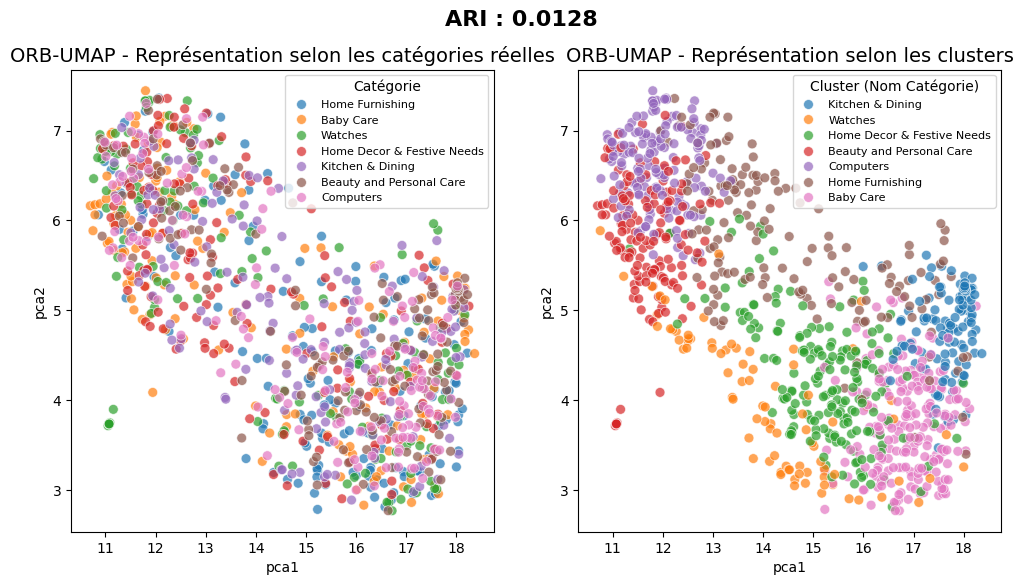

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définition des noms des catégories pour remplacer les indices
category_names = {
    0: "Home Furnishing",
    1: "Baby Care",
    2: "Watches",
    3: "Home Decor & Festive Needs",
    4: "Kitchen & Dining",
    5: "Beauty and Personal Care",
    6: "Computers"
}

# Vérification des dimensions avant de créer le DataFrame
print(f"X_umap_orb.shape : {X_umap_orb.shape}")
print(f"labels.shape : {labels.shape}")
print(f"labels_pred.shape : {labels_pred.shape}")

# Création du DataFrame avec les valeurs UMAP
df_umap_orb = pd.DataFrame(X_umap_orb[:, :2], columns=['pca1', 'pca2'])  # Prend uniquement les 2 premières dimensions

# Ajout des labels réels et des clusters prédits
df_umap_orb["true_label"] = labels
df_umap_orb["cluster"] = labels_pred

# Remplacement des indices par les noms des catégories pour les labels réels et clusters
df_umap_orb["true_label"] = df_umap_orb["true_label"].map(category_names)
df_umap_orb["cluster"] = df_umap_orb["cluster"].map(category_names)  # Ajout pour afficher les noms des clusters

# Affichage des catégories réelles avec noms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="pca1", y="pca2", hue="true_label", data=df_umap_orb, palette="tab10", s=50, alpha=0.7)
plt.title("ORB-UMAP - Représentation selon les catégories réelles", fontsize=14)
plt.legend(title="Catégorie", fontsize=8)

# Affichage des clusters avec noms des catégories
plt.subplot(1, 2, 2)
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=df_umap_orb, palette="tab10", s=50, alpha=0.7)
plt.title("ORB-UMAP - Représentation selon les clusters", fontsize=14)
plt.legend(title="Cluster (Nom Catégorie)", fontsize=8)

plt.suptitle(f"ARI : {ari_score:.4f}", fontsize=16, fontweight="bold")
plt.show()


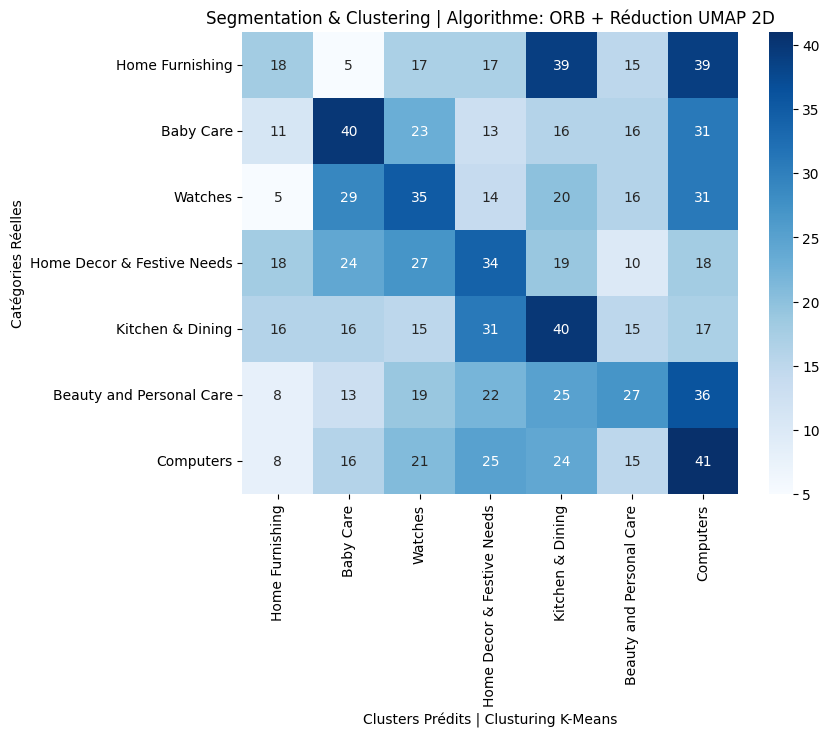

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# On s'assure que les labels réels et les clusters sont bien mappés aux indices numériques
df_umap_orb["true_label_num"] = df_umap_orb["true_label"].map({v: k for k, v in category_names.items()}).astype(int)
df_umap_orb["cluster_num"] = df_umap_orb["cluster"].map({v: k for k, v in category_names.items()}).astype(int)

# Création de la matrice de confusion 
conf_mat_raw = confusion_matrix(df_umap_orb["true_label_num"], df_umap_orb["cluster_num"])

# On trouve la meilleure correspondance entre les clusters K-Means et les vraies catégories
# linear_sum_assignment analyse la matrice de confusion
# Identifie quelle catégorie réelle est majoritaire dans chaque K
# Ré attribue les labels des clusters pour correspondre mieux aux catégories réelles
row_ind, col_ind = linear_sum_assignment(conf_mat_raw, maximize=True)

# Créer un mapping pour réaligner les clusters avec les labels réels
cluster_mapping = {old: new for old, new in zip(col_ind, row_ind)}

# On assigne cluster_num_vf avec cluster_num
# On effectue le mapping avec les catégories
df_umap_orb["cluster_num_vf"] = df_umap_orb["cluster_num"].map(cluster_mapping)

# Recalculer la matrice de confusion avec les clusters réalignés
conf_matrix_vf = confusion_matrix(df_umap_orb["true_label_num"], df_umap_orb["cluster_num_vf"])

# Affichage de la matrice sous forme de heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_vf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_names.values(), yticklabels=category_names.values())

plt.xlabel("Clusters Prédits | Clusturing K-Means")
plt.ylabel("Catégories Réelles")
plt.title("Segmentation & Clustering | Algorithme: ORB + Réduction UMAP 2D")
plt.show()

In [65]:
from sklearn.metrics import classification_report

# Création de la matrice de confusion entre catégories réelles et clusters prédits
conf_mat_temp = confusion_matrix(df_umap_orb["true_label_num"], df_umap_orb["cluster_num_vf"])

# Trouver la meilleure correspondance entre clusters et catégories réelles
# Pour chaque cluster, on identifie la classe réelle dominante
corresp = np.argmax(conf_mat_temp, axis=0)

# Affichage de la correspondance entre les clusters et les vraies classes
print("La correspondance des clusters : ", corresp)

# Transformation des prédictions après réalignement
# Chaque cluster est remplacé par la classe réelle majoritaire associée
cls_labels_transform = df_umap_orb["cluster_num_vf"].apply(lambda x: corresp[x])

# Calcul de la nouvelle matrice de confusion après transformation
conf_mat = confusion_matrix(df_umap_orb["true_label_num"], cls_labels_transform)

# Génération du rapport de classification pour évaluer le clustering K-Means avec les noms des classes
target_names = [category_names[i] for i in sorted(category_names.keys())]

print("\n Rapport de Classification :\n")
print(classification_report(df_umap_orb["true_label_num"], cls_labels_transform, target_names=target_names))

La correspondance des clusters :  [0 1 2 3 4 5 6]

 Rapport de Classification :

                            precision    recall  f1-score   support

           Home Furnishing       0.21      0.12      0.15       150
                 Baby Care       0.28      0.27      0.27       150
                   Watches       0.22      0.23      0.23       150
Home Decor & Festive Needs       0.22      0.23      0.22       150
          Kitchen & Dining       0.22      0.27      0.24       150
  Beauty and Personal Care       0.24      0.18      0.20       150
                 Computers       0.19      0.27      0.23       150

                  accuracy                           0.22      1050
                 macro avg       0.23      0.22      0.22      1050
              weighted avg       0.23      0.22      0.22      1050



Definition des métriques de la matrice de confusion :
- **Precision** (Précision)
→ Proportion des éléments correctement classés parmi ceux prédit comme appartenant à une classe donnée.

- **Recall** (Rappel ou Sensibilité)
→ Proportion des éléments correctement classés parmi ceux qui appartiennent réellement à une classe donnée.

- **F1-score**
→ Moyenne harmonique entre la précision et le rappel, utile quand on veut un bon équilibre entre les deux.

- **Support**
→ Nombre total d’exemples réels appartenant à une classe donnée.
Interprétation : Plus le support est élevé, plus la classe est représentée dans le jeu de données.

1. **Précision** = Parmi les prédictions positives, combien sont correctes ?
2. **Rappel** = Parmi les vrais éléments d’une classe, combien sont bien détectés ?
3. **F1-score** = Moyenne équilibrée entre Précision et Rappel.
4. **Support** = Nombre d'éléments réels par classe.


## 3. IMAGE_Prétraitement - Feature Extraction <span style="color:red">(Avancée)</span> - Réduction _2d_ - Clustering K-Means + Évaluation ARI"

### <span style="color:green">CNN</span>  |  **Convolutional Neural Network**, _(Réseau de Neurones Convolutif)_

#### 0. <span style="color:orange">Description et hyperparametre de Convolution Neural Network</span>

                                                                    **DEFINITION CONVOLUTIONAL NEURAL NETWORK**

Un CNN (**Convolutional Neural Network**) est un type de réseau de neurones artificiels spécialisé dans **le traitement des images** et **des données visuelles**. Il (cet Algorithme) est conçu pour **détecter automatiquement** des **motifs** et **caractéristiques importantes** dans une **image**, sans nécessiter d’ingénierie manuelle des features.


1. **Couches de Convolution**
Appliquent des filtres pour extraire des caractéristiques importantes (bords, textures, formes).
Permettent la reconnaissance des objets indépendamment de leur position dans l’image.

2. **Couches de Pooling**
Réduisent la taille des images tout en conservant les informations essentielles.
Améliorent la robustesse du modèle face aux déformations et aux variations d’échelle.

3. **Hiérarchie des Features**
- Les premières couches détectent des motifs simples (bords, textures).
- Les couches intermédiaires repèrent des formes plus complexes (coins, contours).
- Les couches profondes identifient des objets complets (visage, voiture, chat).

4. **Partage des Poids**
 Les Convolutional Neural Network partagent les poids des filtres, ce qui réduit le nombre de paramètres et évite le surapprentissage.

5. **Invariance aux Transformations **
Grâce aux couches de pooling et aux filtres convolutifs, un CNN peut reconnaître un objet même s’il est déplacé, agrandi ou déformé.

----------------------------------------------------**On utilise Convolutional Neural Network pour la** :--------------------------------------------------
- **Reconnaissance d’images (classification d’objets, reconnaissance faciale)**
- **Segmentation d’images (voitures, piétons dans une vidéo)**
- **Détection d’anomalies (inspection industrielle, radiologie)**
- **Vision par ordinateur (véhicules autonomes, réalité augmentée)**

 ----------------------------------------------------------**LES HYPERPARAMETRES DE CONVOLUTION NEURAL NETWORK**-------------------------------------------

1. Paramètres liés aux couches convolutionnelles
   
- Nombre de filtres (kernels) : Nombre de matrices (filtres) apprenant des caractéristiques dans chaque couche convolutionnelle.
- Taille du filtre (kernel size) : Dimensions du noyau (ex. 3x3, 5x5) qui définit la zone d’analyse locale des images.
- Stride (pas de convolution) : Déplacement du noyau sur l’image (ex. 1 = pas de 1 pixel).

Padding : Ajout de zéros autour de l’image pour préserver la taille de sortie.
- "valid" → Pas de padding.
- "same" → Padding pour conserver la taille d’entrée.
- Fonction d’activation : Fonction non linéaire appliquée après la convolution (ex. ReLU, sigmoid, tanh).

3. Paramètres liés aux couches de pooling

Type de pooling :
- MaxPooling → Garde la valeur maximale d’une région.
- AveragePooling → Fait la moyenne des valeurs d’une région.

Taille de pooling (pool size) : Dimensions de la fenêtre de sous-échantillonnage (ex. 2x2).
- Stride du pooling : Nombre de pixels de déplacement lors du pooling.

4. Paramètres liés aux couches entièrement connectées (Dense Layers)
- Nombre de neurones : Nombre de neurones dans chaque couche dense après la partie convolutionnelle.
- Fonction d’activation : Fonction appliquée aux neurones (ReLU, softmax, sigmoid).

6. Paramètres liés à l'entraînement
- Taux d’apprentissage (learning rate) : Vitesse d’ajustement des poids pendant l’apprentissage.
- Optimiseur : Algorithme de mise à jour des poids (SGD, Adam, RMSprop).
- Nombre d’époques (epochs) : Nombre de passages complets sur l’ensemble des données d’entraînement.
- Taille du batch (batch size) : Nombre d’exemples traités avant mise à jour des poids.
  
Méthode de régularisation :
- Dropout : Désactivation aléatoire d’un pourcentage de neurones pour éviter l’overfitting.
- L1/L2 Regularization : Ajout d’une pénalité sur les poids pour contrôler leur magnitude.
  
7. Paramètres liés aux architectures avancées
- Nombre de blocs convolutifs : Nombre de couches convolutionnelles avant de passer aux couches denses.

Type de normalisation :
- Batch Normalization : Normalisation des activations pour stabiliser l’entraînement.
- Layer Normalization : Normalisation au niveau de chaque couche.
- Type de connexion entre couches :
- Residual Connections (ResNet) → Saut de couches pour éviter la dégradation du gradient.
- Skip Connections (U-Net) → Connexion directe entre certaines couches pour récupérer les détails.

Type d’architecture spécifique :
- CNN classique → Empilement simple de convolutions et pooling.
- VGG → Convolutions 3x3 avec plusieurs couches denses finales.
- ResNet → Ajout de connexions résiduelles pour éviter la disparition du gradient.
- Inception → Combinaison de filtres de différentes tailles pour capturer plusieurs échelles.  

| **Hyperparamètre**     | **Description**                                                 | **Exemples / Valeurs** |
|-----------------------|-----------------------------------------------------------------|------------------------|
| **Couches Convolutionnelles** |  |
| `n_filters`          | Nombre de filtres (kernels) par couche convolutionnelle         | `32`, `64`, `128`      |
| `kernel_size`        | Taille du filtre de convolution                                | `(3,3)`, `(5,5)`      |
| `stride`            | Pas de déplacement du filtre                                   | `1`, `2`              |
| `padding`           | Ajout de zéros autour de l’image                               | `"valid"`, `"same"`   |
| `activation`        | Fonction d’activation après convolution                        | `ReLU`, `sigmoid`     |
| **Couches de Pooling** |  |
| `pool_type`         | Type de pooling (réduction de dimension)                       | `MaxPooling`, `AvgPooling` |
| `pool_size`        | Taille de la fenêtre de pooling                               | `(2,2)`, `(3,3)`      |
| `pool_stride`      | Pas de déplacement du pooling                                 | `1`, `2`              |
| **Couches Entièrement Connectées (Dense)** |  |
| `n_units`          | Nombre de neurones dans les couches Dense                      | `128`, `256`, `512`   |
| `dense_activation` | Fonction d'activation dans les couches Dense                   | `ReLU`, `softmax`     |
| **Optimisation et Entraînement** |  |
| `learning_rate`    | Taux d’apprentissage du modèle                                | `0.001`, `0.0001`     |
| `optimizer`        | Algorithme d’optimisation                                    | `SGD`, `Adam`, `RMSprop` |
| `epochs`          | Nombre de passages sur les données                            | `10`, `50`, `100`     |
| `batch_size`      | Nombre d’échantillons traités avant la mise à jour des poids | `32`, `64`, `128`     |
| `loss_function`   | Fonction de perte                                            | `categorical_crossentropy`, `MSE` |
| **Régularisation** |  |
| `dropout_rate`    | Pourcentage de neurones désactivés pour éviter l'overfitting | `0.3`, `0.5`          |
| `L1/L2 Regularization` | Pénalité sur les poids pour éviter des valeurs trop grandes | `L2(0.01)`           |
| **Architecture Spécifique** |  |
| `n_conv_blocks`   | Nombre de blocs convolutionnels                              | `3`, `5`, `10`        |
| `batch_norm`      | Normalisation des entrées d’une couche                       | `Oui` / `Non`         |
| `residual_connections` | Connexions résiduelles (ResNet)                          | `Oui` / `Non`         |
| `skip_connections` | Connexions directes entre couches (U-Net)                   | `Oui` / `Non`         |


#### 1. <span style="color:orange">Extraction des caractéristiques avec VGG16</span>

**VGG16** est un réseau de neurones convolutif (CNN) développé par l’équipe **d’Oxford Visual Geometry Group (VGG)**. Il a été conçu pour la **classification d'images** et a été utilisé lors du challenge ILSVRC-2014 (ImageNet Large Scale Visual Recognition Challenge), où il a obtenu d'excellentes performance


/LA STRUCTURE DE **V**isual **G**eometry **G**roup **16**
- **16 couches profondes** (d'où le nom VGG16).
- **Composé uniquement de convolutions** 3x3, suivies de ReLU et de max-pooling 2x2.
- Terminé par **3 couches entièrement connectées (FC)** et une softmax pour la classification.

- **TensorFlow** est une bibliothèque open-source développée par Google pour le Machine Learning et l'Intelligence Artificielle. Il est principalement utilisé pour l'apprentissage automatique (ML) et l'apprentissage profond (Deep Learning).
  
- Très souvent utilisé pour le **traitement d’images** en Deep Learning. Il permet aussi de travailler sur d'autres types de données comme **le texte (NLP)**, les séries temporelles et les données tabulaires.

In [ ]:
import numpy as np
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D

# Charger VGG16 sans la dernière couche fully connected
# Charger VGG16 sans la dernière couche "(include_top=False)" permet d'utiliser le modèle comme extracteur de features
# Plutôt que pour la classification finale d'ImageNet.
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

# Définition du dossier contenant les images
image_folder = r"C:\Python311\Scripts\P6_Classifiez Automatiquement des biens de consommations\IMAGE\IMAGE"

# Listes pour stocker les features et labels
images_features = []
labels = []

# Vérification du nombre d'images dans `pictorial_dataset`
print(f"Nombre total d'images dans le dataset : {len(pictorial_dataset)}")

i = 0  # Compteur d'images traitées
for idx, row in pictorial_dataset.iterrows():
    image_filename = row["image"]  # Utilisation de la colonne qui contient les noms d'images

    # Vérifier que l'image a une extension valide (notre format est jpg)
    if not image_filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        print(f"Fichier ignoré (pas une image) : {image_filename}")
        continue

    full_image_path = os.path.join(image_folder, image_filename)  # Construire le chemin complet

    # Vérification que l'image existe
    if not os.path.exists(full_image_path):
        print(f"Image non trouvée : {full_image_path}")
        continue

    if i % 100 == 0:
        print(f"Progression : {i} images traitées")
    i += 1

    try:
        # Chargement et prétraitement de l'image
        image = load_img(full_image_path, target_size=(224, 224))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = preprocess_input(image)

        # Extraction des features avec VGG16
        features = model.predict(image, verbose=0)
        images_features.append(features[0])

        # Stockage du label (vraie catégorie)
        labels.append(row["label"])  # Associer chaque image à son vrai label

    except Exception as e:
        print(f"Erreur avec l'image {full_image_path} : {e}")
        continue

# Vérification avant la conversion en NumPy array
if len(images_features) == 0:
    raise ValueError(" ! Aucune feature extraite. Il faut vérifier les chemins d'images et la colonne `image`.")

# Conversion en tableau NumPy
images_features = np.array(images_features)
labels = np.array(labels)

print("Extraction terminée. Dimensions des features :", images_features.shape)
print("Nombre de labels :", labels.shape)

# Sauvegarde des features et labels
np.save("features.npy", images_features)
np.save("labels.npy", labels)
print("Features et labels sauvegardés !")


Nombre total d'images dans le dataset : 1050
Progression : 0 images traitées
Progression : 100 images traitées
Progression : 200 images traitées
Progression : 300 images traitées
Progression : 400 images traitées
Progression : 500 images traitées
Progression : 600 images traitées
Progression : 700 images traitées
Progression : 800 images traitées


C:\Python311\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Progression : 900 images traitées
Progression : 1000 images traitées
Extraction terminée. Dimensions des features : (1050, 512)
Nombre de labels : (1050,)
Features et labels sauvegardés !


- Chaque élément de images_features est un vecteur de caractéristiques (features) obtenu après le passage de l'image à travers VGG16.
- La couche GlobalAveragePooling2D réduit la sortie en un vecteur de taille (512,) pour chaque image.
- Chaque image est convertie en une représentation numérique optimisée pour l'apprentissage automatique.

#### <span style="color:orange">Réduction 2d PCA (Analyse en Composantes Principales)+ K means + score ARI</span>

🎯 Hyperparamètres de PCA (Principal Component Analysis)

| **Hyperparamètre**  | **Description**                                               | **Valeur par défaut** |
|--------------------|--------------------------------------------------------------|----------------------|
| `n_components`    | Nombre de composantes principales conservées (doit être ≤ nombre de features). | `None` (autant que possible) |
| `copy`            | Copie les données avant transformation (`True`) ou modifie les données en place (`False`). | `True` |
| `whiten`          | Normalisation des composantes pour éviter des corrélations (`True` / `False`). | `False` |
| `svd_solver`      | Algorithme utilisé pour la décomposition SVD (`auto`, `full`, `arpack`, `randomized`). | `"auto"` |
| `tol`             | Seuil de tolérance pour l’arrêt des calculs (uniquement pour `arpack`). | `0.0` |
| `iterated_power`  | Nombre d'itérations de puissance pour l'algorithme `randomized`. | `"auto"` |
| `random_state`    | Graine aléatoire pour reproductibilité (utile pour `randomized`). | `None` |


In [67]:
# Importation de la classe PCA pour la réduction de dimension
from sklearn.decomposition import PCA


# Vérification des dimensions avant réduction
print("Dimensions dataset avant réduction PCA : ", images_features.shape)

# Définition du modèle PCA avec 100 composantes principales
# Cette valeur a été déterminée comme optimale après des tests pour maximiser le score ARI
pca = PCA(n_components=100)

# Appliquer PCA sur les caractéristiques des images
feat_pca_cnn = pca.fit_transform(images_features)

print("Dimensions dataset après réduction PCA : ", feat_pca_cnn.shape)


Dimensions dataset avant réduction PCA :  (1050, 512)
Dimensions dataset après réduction PCA :  (1050, 100)


In [68]:
from sklearn.cluster import KMeans
n_clusters = len(np.unique(labels))  # Nombre de vraies catégories
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(feat_pca_cnn)

print("Clustering terminé !")

Clustering terminé !


In [69]:
# Verrification du nombre de cluster
print("Nombre unique de labels réels :", len(np.unique(labels)))
print("Nombre de clusters à définir:", n_clusters)

Nombre unique de labels réels : 7
Nombre de clusters à définir: 7


In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Nombre de clusters = Nombre de catégories réelles ici #7
n_clusters = len(np.unique(labels))

# Appliquer K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_pred = kmeans.fit_predict(feat_pca_cnn)

# Calcul du score ARI
ari_score = adjusted_rand_score(labels, labels_pred)
print(f"ARI : {ari_score:.4f}")


ARI : 0.3552


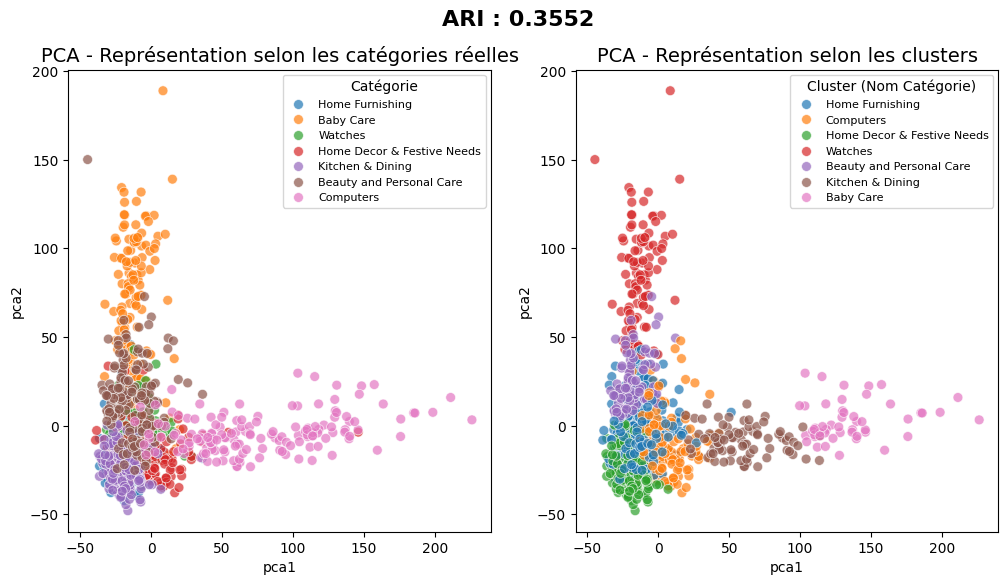

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définition des noms des catégories pour remplacer les indices
category_names = {
    0: "Home Furnishing",
    1: "Baby Care",
    2: "Watches",
    3: "Home Decor & Festive Needs",
    4: "Kitchen & Dining",
    5: "Beauty and Personal Care",
    6: "Computers"
}


# Création du DataFrame avec les valeurs 
df_pca_cnn = pd.DataFrame(feat_pca_cnn[:, :2], columns=['pca1', 'pca2'])  # Prend uniquement les 2 premières dimensions

# Ajout des labels réels et des clusters prédits
df_pca_cnn["true_label"] = labels
df_pca_cnn["cluster"] = labels_pred


# Remplacement des indices par les noms des catégories pour les labels réels et clusters
df_pca_cnn["true_label"] = df_pca_cnn["true_label"].map(category_names)
df_pca_cnn["cluster"] = df_pca_cnn["cluster"].map(category_names)  # Ajout pour afficher les noms des clusters

# Affichage des catégories réelles avec noms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="pca1", y="pca2", hue="true_label", data=df_pca_cnn, palette="tab10", s=50, alpha=0.7)
plt.title("PCA - Représentation selon les catégories réelles", fontsize=14)
plt.legend(title="Catégorie", fontsize=8)

# Affichage des clusters avec noms des catégories
plt.subplot(1, 2, 2)
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=df_pca_cnn, palette="tab10", s=50, alpha=0.7)
plt.title("PCA - Représentation selon les clusters", fontsize=14)
plt.legend(title="Cluster (Nom Catégorie)", fontsize=8)

plt.suptitle(f"ARI : {ari_score:.4f}", fontsize=16, fontweight="bold")
plt.show()


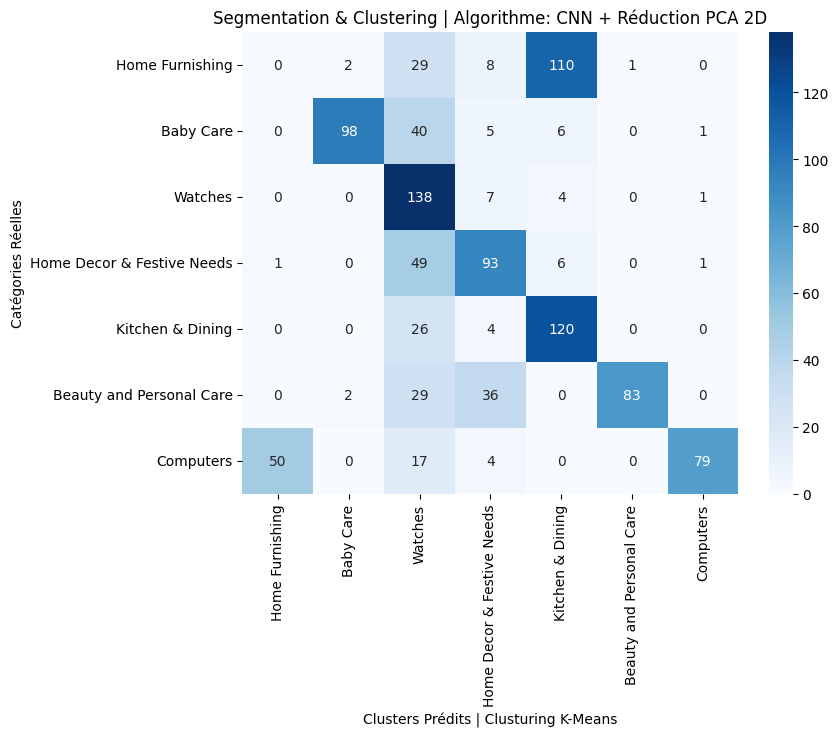

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# On s'assure que les labels réels et les clusters sont bien mappés aux indices numériques
df_pca_cnn["true_label_num"] = df_pca_cnn["true_label"].map({v: k for k, v in category_names.items()}).astype(int)
df_pca_cnn["cluster_num"] = df_pca_cnn["cluster"].map({v: k for k, v in category_names.items()}).astype(int)

# Création de la matrice de confusion 
conf_mat_raw = confusion_matrix(df_pca_cnn["true_label_num"], df_pca_cnn["cluster_num"])

# On trouve la meilleure correspondance entre les clusters K-Means et les vraies catégories
# linear_sum_assignment analyse la matrice de confusion
# Identifie quelle catégorie réelle est majoritaire dans chaque K
# Ré attribue les labels des clusters pour correspondre mieux aux catégories réelles
row_ind, col_ind = linear_sum_assignment(conf_mat_raw, maximize=True)

# Créer un mapping pour réaligner les clusters avec les labels réels
cluster_mapping = {old: new for old, new in zip(col_ind, row_ind)}

# On assigne cluster_num_vf avec cluster_num
# On effectue le mapping avec les catégories
df_pca_cnn["cluster_num_vf"] = df_pca_cnn["cluster_num"].map(cluster_mapping)

# Recalculer la matrice de confusion avec les clusters réalignés
conf_matrix_vf = confusion_matrix(df_pca_cnn["true_label_num"], df_pca_cnn["cluster_num_vf"])

# Affichage de la matrice sous forme de heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_vf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_names.values(), yticklabels=category_names.values())

plt.xlabel("Clusters Prédits | Clusturing K-Means")
plt.ylabel("Catégories Réelles")
plt.title("Segmentation & Clustering | Algorithme: CNN + Réduction PCA 2D")
plt.show()

In [73]:
from sklearn.metrics import classification_report

# Création de la matrice de confusion entre catégories réelles et clusters prédits
conf_mat_temp = confusion_matrix(df_pca_cnn["true_label_num"], df_pca_cnn["cluster_num_vf"])

# Trouver la meilleure correspondance entre clusters et catégories réelles
# Pour chaque cluster, on identifie la classe réelle dominante
corresp = np.argmax(conf_mat_temp, axis=0)

# Affichage de la correspondance entre les clusters et les vraies classes
print("La correspondance des clusters : ", corresp)

# Transformation des prédictions après réalignement
# Chaque cluster est remplacé par la classe réelle majoritaire associée
cls_labels_transform = df_pca_cnn["cluster_num_vf"].apply(lambda x: corresp[x])

# Calcul de la nouvelle matrice de confusion après transformation
conf_mat = confusion_matrix(df_pca_cnn["true_label_num"], cls_labels_transform)

# Affichage de la matrice de confusion 
print("\n Matrice de Confusion Finale :\n", conf_mat)


# Génération du rapport de classification pour évaluer le clustering K-Means avec les noms des classes
target_names = [category_names[i] for i in sorted(category_names.keys())]

print("\n Rapport de Classification :\n")
print(classification_report(df_pca_cnn["true_label_num"], cls_labels_transform, target_names=target_names))


La correspondance des clusters :  [6 1 2 3 4 5 6]

 Matrice de Confusion Finale :
 [[  0   2  29   8 110   1   0]
 [  0  98  40   5   6   0   1]
 [  0   0 138   7   4   0   1]
 [  0   0  49  93   6   0   2]
 [  0   0  26   4 120   0   0]
 [  0   2  29  36   0  83   0]
 [  0   0  17   4   0   0 129]]

 Rapport de Classification :

                            precision    recall  f1-score   support

           Home Furnishing       0.00      0.00      0.00       150
                 Baby Care       0.96      0.65      0.78       150
                   Watches       0.42      0.92      0.58       150
Home Decor & Festive Needs       0.59      0.62      0.61       150
          Kitchen & Dining       0.49      0.80      0.61       150
  Beauty and Personal Care       0.99      0.55      0.71       150
                 Computers       0.97      0.86      0.91       150

                  accuracy                           0.63      1050
                 macro avg       0.63      0.63      0

C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Definition des métriques de la matrice de confusion :
- **Precision** (Précision)
→ Proportion des éléments correctement classés parmi ceux prédit comme appartenant à une classe donnée.

- **Recall** (Rappel ou Sensibilité)
→ Proportion des éléments correctement classés parmi ceux qui appartiennent réellement à une classe donnée.

- **F1-score**
→ Moyenne harmonique entre la précision et le rappel, utile quand on veut un bon équilibre entre les deux.

- **Support**
→ Nombre total d’exemples réels appartenant à une classe donnée.
Interprétation : Plus le support est élevé, plus la classe est représentée dans le jeu de données.

1. **Précision** = Parmi les prédictions positives, combien sont correctes ?
2. **Rappel** = Parmi les vrais éléments d’une classe, combien sont bien détectés ?
3. **F1-score** = Moyenne équilibrée entre Précision et Rappel.
4. **Support** = Nombre d'éléments réels par classe.


#### <span style="color:orange">Réduction 2d t-SNE (t-Distributed Stochastic Neighbor Embedding) + K means + score ARI</span>

🎯 Hyperparamètres de t-SNE (t-Distributed Stochastic Neighbor Embedding)

| **Hyperparamètre**  | **Description**                                              | **Valeur par défaut** |
|--------------------|-------------------------------------------------------------|----------------------|
| `n_components`    | Nombre de dimensions en sortie (généralement `2` ou `3`).   | `2` |
| `perplexity`      | Nombre de voisins considérés pour chaque point.              | `30.0` |
| `early_exaggeration` | Facteur d'expansion des distances en début d’optimisation. | `12.0` |
| `learning_rate`   | Vitesse d'apprentissage (entre `10` et `1000`).              | `200.0` |
| `n_iter`         | Nombre total d'itérations du gradient.                        | `1000` |
| `n_iter_without_progress` | Nombre d’itérations sans amélioration avant arrêt. | `300` |
| `min_grad_norm`  | Seuil minimal pour l’arrêt du gradient.                       | `1e-7` |
| `metric`         | Métrique de distance entre les points (`euclidean`, `cosine`, etc.). | `"euclidean"` |
| `init`          | Initialisation (`random` ou `pca`).                            | `"random"` |
| `random_state`  | Graine aléatoire pour reproductibilité.                        | `None` |
| `method`        | Algorithme d’optimisation (`barnes_hut` ou `exact`).           | `"barnes_hut"` |
| `angle`         | Paramètre d’accélération Barnes-Hut (`0.5` recommandé).        | `0.5` |
| `verbose`       | Niveau d’affichage (`0` = silence, `1` = affichage).           | `0` |
| `square_distances` | Utilise les distances au carré (`True`/`False`).            | `True` (`exact`), `False` (`barnes_hut`) |


In [74]:
from sklearn.manifold import TSNE

print("Dimensions dataset avant réduction t-SNE : ", feat_pca_cnn.shape)

# Réduction de dimension avec T-SNE
tsne = TSNE(n_components=2, perplexity=20, n_iter=2000, learning_rate=50, random_state=6)
X_tsne_cnn = tsne.fit_transform(feat_pca_cnn)

print("Dimensions dataset après réduction t-SNE : ", X_tsne_cnn.shape)

Dimensions dataset avant réduction t-SNE :  (1050, 100)


C:\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Dimensions dataset après réduction t-SNE :  (1050, 2)


In [75]:
from sklearn.cluster import KMeans

n_clusters = len(np.unique(labels))  # Nombre de vraies catégories
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_tsne_cnn)
print("Clustering terminé !")


Clustering terminé !


In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Nombre de clusters = Nombre de catégories réelles ici #7
n_clusters = len(np.unique(labels))

# Appliquer K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_pred_tsne = kmeans.fit_predict(X_tsne_cnn)

# Calcul du score ARI
ari_score = adjusted_rand_score(labels, labels_pred_tsne)
print(f"ARI : {ari_score:.4f}")


ARI : 0.4133


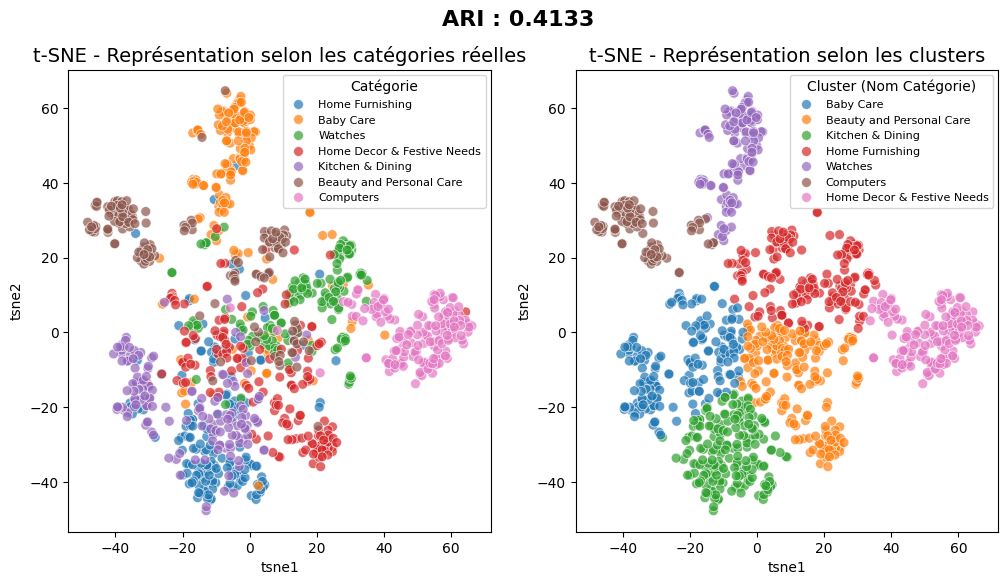

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définition des noms des catégories pour remplacer les indices
category_names = {
    0: "Home Furnishing",
    1: "Baby Care",
    2: "Watches",
    3: "Home Decor & Festive Needs",
    4: "Kitchen & Dining",
    5: "Beauty and Personal Care",
    6: "Computers"
}

# Création du DataFrame
df_tsne_cnn = pd.DataFrame(X_tsne_cnn, columns=['tsne1', 'tsne2'])
df_tsne_cnn["true_label"] = labels
df_tsne_cnn["cluster"] = labels_pred_tsne

# Remplacement des indices par les noms des catégories pour les labels réels et clusters
df_tsne_cnn["true_label"] = df_tsne_cnn["true_label"].map(category_names)
df_tsne_cnn["cluster"] = df_tsne_cnn["cluster"].map(category_names)  # Ajout pour afficher les noms des clusters

# Affichage des catégories réelles avec noms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="tsne1", y="tsne2", hue="true_label", data=df_tsne_cnn, palette="tab10", s=50, alpha=0.7)
plt.title("t-SNE - Représentation selon les catégories réelles", fontsize=14)
plt.legend(title="Catégorie", fontsize=8)

# Affichage des clusters avec noms des catégories
plt.subplot(1, 2, 2)
sns.scatterplot(x="tsne1", y="tsne2", hue="cluster", data=df_tsne_cnn, palette="tab10", s=50, alpha=0.7)
plt.title("t-SNE - Représentation selon les clusters", fontsize=14)
plt.legend(title="Cluster (Nom Catégorie)", fontsize=8)

plt.suptitle(f"ARI : {ari_score:.4f}", fontsize=16, fontweight="bold")
plt.show()


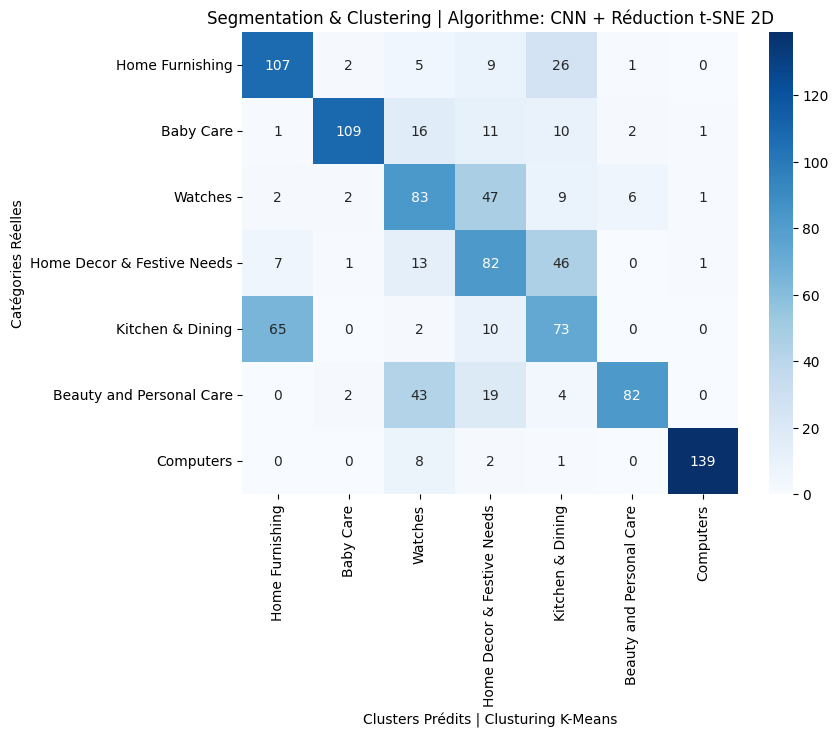

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# On s'assure que les labels réels et les clusters sont bien mappés aux indices numériques
df_tsne_cnn["true_label_num"] = df_tsne_cnn["true_label"].map({v: k for k, v in category_names.items()}).astype(int)
df_tsne_cnn["cluster_num"] = df_tsne_cnn["cluster"].map({v: k for k, v in category_names.items()}).astype(int)

# Création de la matrice de confusion 
conf_mat_raw = confusion_matrix(df_tsne_cnn["true_label_num"], df_tsne_cnn["cluster_num"])

# On trouve la meilleure correspondance entre les clusters K-Means et les vraies catégories
# linear_sum_assignment analyse la matrice de confusion
# Identifie quelle catégorie réelle est majoritaire dans chaque K
# Ré attribue les labels des clusters pour correspondre mieux aux catégories réelles
row_ind, col_ind = linear_sum_assignment(conf_mat_raw, maximize=True)

# Créer un mapping pour réaligner les clusters avec les labels réels
cluster_mapping = {old: new for old, new in zip(col_ind, row_ind)}

# On assigne cluster_num_vf avec cluster_num
# On effectue le mapping avec les catégories
df_tsne_cnn["cluster_num_vf"] = df_tsne_cnn["cluster_num"].map(cluster_mapping)

# Recalculer la matrice de confusion avec les clusters réalignés
conf_matrix_vf = confusion_matrix(df_tsne_cnn["true_label_num"], df_tsne_cnn["cluster_num_vf"])

# Affichage de la matrice sous forme de heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_vf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_names.values(), yticklabels=category_names.values())

plt.xlabel("Clusters Prédits | Clusturing K-Means")
plt.ylabel("Catégories Réelles")
plt.title("Segmentation & Clustering | Algorithme: CNN + Réduction t-SNE 2D")
plt.show()

In [79]:
from sklearn.metrics import classification_report

# Création de la matrice de confusion entre catégories réelles et clusters prédits
conf_mat_temp = confusion_matrix(df_tsne_cnn["true_label_num"], df_tsne_cnn["cluster_num_vf"])

# Trouver la meilleure correspondance entre clusters et catégories réelles
# Pour chaque cluster, on identifie la classe réelle dominante
corresp = np.argmax(conf_mat_temp, axis=0)

# Affichage de la correspondance entre les clusters et les vraies classes
print("La correspondance des clusters : ", corresp)

# Transformation des prédictions après réalignement
# Chaque cluster est remplacé par la classe réelle majoritaire associée
cls_labels_transform = df_tsne_cnn["cluster_num_vf"].apply(lambda x: corresp[x])

# Calcul de la nouvelle matrice de confusion après transformation
conf_mat = confusion_matrix(df_tsne_cnn["true_label_num"], cls_labels_transform)

# Génération du rapport de classification pour évaluer le clustering K-Means avec les noms des classes
target_names = [category_names[i] for i in sorted(category_names.keys())]

print("\n Rapport de Classification :\n")
print(classification_report(df_tsne_cnn["true_label_num"], cls_labels_transform, target_names=target_names))


La correspondance des clusters :  [0 1 2 3 4 5 6]

 Rapport de Classification :

                            precision    recall  f1-score   support

           Home Furnishing       0.59      0.71      0.64       150
                 Baby Care       0.94      0.73      0.82       150
                   Watches       0.49      0.55      0.52       150
Home Decor & Festive Needs       0.46      0.55      0.50       150
          Kitchen & Dining       0.43      0.49      0.46       150
  Beauty and Personal Care       0.90      0.55      0.68       150
                 Computers       0.98      0.93      0.95       150

                  accuracy                           0.64      1050
                 macro avg       0.68      0.64      0.65      1050
              weighted avg       0.68      0.64      0.65      1050



Definition des métriques de la matrice de confusion :
- **Precision** (Précision)
→ Proportion des éléments correctement classés parmi ceux prédit comme appartenant à une classe donnée.

- **Recall** (Rappel ou Sensibilité)
→ Proportion des éléments correctement classés parmi ceux qui appartiennent réellement à une classe donnée.

- **F1-score**
→ Moyenne harmonique entre la précision et le rappel, utile quand on veut un bon équilibre entre les deux.

- **Support**
→ Nombre total d’exemples réels appartenant à une classe donnée.
Interprétation : Plus le support est élevé, plus la classe est représentée dans le jeu de données.

1. **Précision** = Parmi les prédictions positives, combien sont correctes ?
2. **Rappel** = Parmi les vrais éléments d’une classe, combien sont bien détectés ?
3. **F1-score** = Moyenne équilibrée entre Précision et Rappel.
4. **Support** = Nombre d'éléments réels par classe.


#### <span style="color:orange">Réduction 2d UMAP (Uniform Manifold Approximation and Projection) + K means + score ARI</span>

🎯 Hyperparamètres de UMAP (Uniform Manifold Approximation and Projection)

| **Hyperparamètre**  | **Description**                                             | **Valeur par défaut** |
|--------------------|-------------------------------------------------------------|----------------------|
| `n_neighbors`     | Nombre de voisins pris en compte pour définir la structure locale. | `15` |
| `n_components`    | Nombre de dimensions en sortie.                              | `2` |
| `metric`         | Métrique de distance (`euclidean`, `cosine`, etc.).           | `"euclidean"` |
| `output_metric`  | Métrique de distance après réduction (`euclidean`, `cosine`, etc.). | `"euclidean"` |
| `min_dist`       | Distance minimale entre les points projetés.                  | `0.1` |
| `spread`         | Contrôle l’étalement des clusters.                            | `1.0` |
| `set_op_mix_ratio` | Contrôle l’équilibre entre structure locale et globale (`0.0` = local, `1.0` = global). | `1.0` |
| `local_connectivity` | Nombre minimal de connexions locales par point.          | `1.0` |
| `repulsion_strength` | Force de répulsion entre points.                         | `1.0` |
| `negative_sample_rate` | Nombre d’échantillons négatifs pour équilibrer distances. | `5` |
| `init`           | Méthode d'initialisation (`spectral`, `random`).              | `"spectral"` |
| `transform_seed` | Graine aléatoire pour reproductibilité.                        | `42` |
| `low_memory`      | Réduction de la mémoire consommée (`True` ou `False`).      | `False` |
| `n_epochs`       | Nombre d'itérations du gradient (`None` pour auto).          | `None` |
| `alpha`          | Taux d’apprentissage de l’optimisation.                      | `1.0` |
| `gamma`          | Contrôle la force des liens inter-clusters.                  | `1.0` |
| `verbose`        | Niveau d’affichage (`True` = affiche, `False` = silencieux). | `False` |


In [80]:
import umap
import numpy as np

print("Dimensions dataset avant réduction UMAP : ", feat_pca_cnn.shape)

# Réduction de dimension avec UMAP
umap_reducer = umap.UMAP(n_components=2, n_neighbors=40, min_dist=0.1, metric='euclidean', random_state=6)
X_umap_cnn = umap_reducer.fit_transform(feat_pca_cnn)

print("Dimensions dataset après réduction UMAP : ", X_umap_cnn.shape)


Dimensions dataset avant réduction UMAP :  (1050, 100)


C:\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dimensions dataset après réduction UMAP :  (1050, 2)


In [81]:
from sklearn.cluster import KMeans

n_clusters = len(np.unique(labels))  # Nombre de vraies catégories
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_umap_cnn)
print("Clustering terminé !")

Clustering terminé !


In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Nombre de clusters = Nombre de catégories réelles ici #7
n_clusters = len(np.unique(labels))

# Appliquer K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_pred_umap = kmeans.fit_predict(X_umap_cnn)

# Calcul du score ARI
ari_score = adjusted_rand_score(labels, labels_pred_umap)
print(f"ARI : {ari_score:.4f}")


ARI : 0.4384


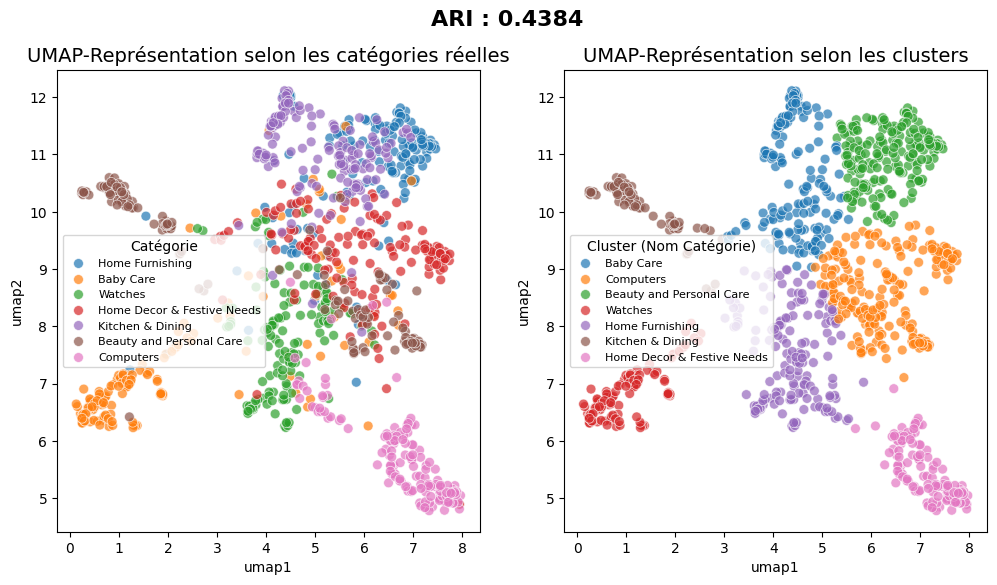

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Définition des noms de catégories pour remplacer les indices
category_names = {
    0: "Home Furnishing",
    1: "Baby Care",
    2: "Watches",
    3: "Home Decor & Festive Needs",
    4: "Kitchen & Dining",
    5: "Beauty and Personal Care",
    6: "Computers"
}

# Création du DataFrame
df_umap_cnn = pd.DataFrame(X_umap_cnn, columns=['umap1', 'umap2'])
df_umap_cnn["true_label"] = labels
df_umap_cnn["cluster"] = labels_pred_umap

# Remplacement des indices des labels réels et des clusters par les noms des catégories
df_umap_cnn["true_label"] = df_umap_cnn["true_label"].map(category_names)
df_umap_cnn["cluster"] = df_umap_cnn["cluster"].map(category_names)  # Ajout pour modifier la légende des clusters

# Affichage des catégories réelles avec noms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="umap1", y="umap2", hue="true_label", data=df_umap_cnn, palette="tab10", s=50, alpha=0.7)
plt.title("UMAP-Représentation selon les catégories réelles", fontsize=14)
plt.legend(title="Catégorie", fontsize=8)

# Affichage des clusters avec les noms des catégories
plt.subplot(1, 2, 2)
sns.scatterplot(x="umap1", y="umap2", hue="cluster", data=df_umap_cnn, palette="tab10", s=50, alpha=0.7)
plt.title("UMAP-Représentation selon les clusters", fontsize=14)
plt.legend(title="Cluster (Nom Catégorie)", fontsize=8)  # Mise à jour du titre

plt.suptitle(f"ARI : {ari_score:.4f}", fontsize=16, fontweight="bold")
plt.show()


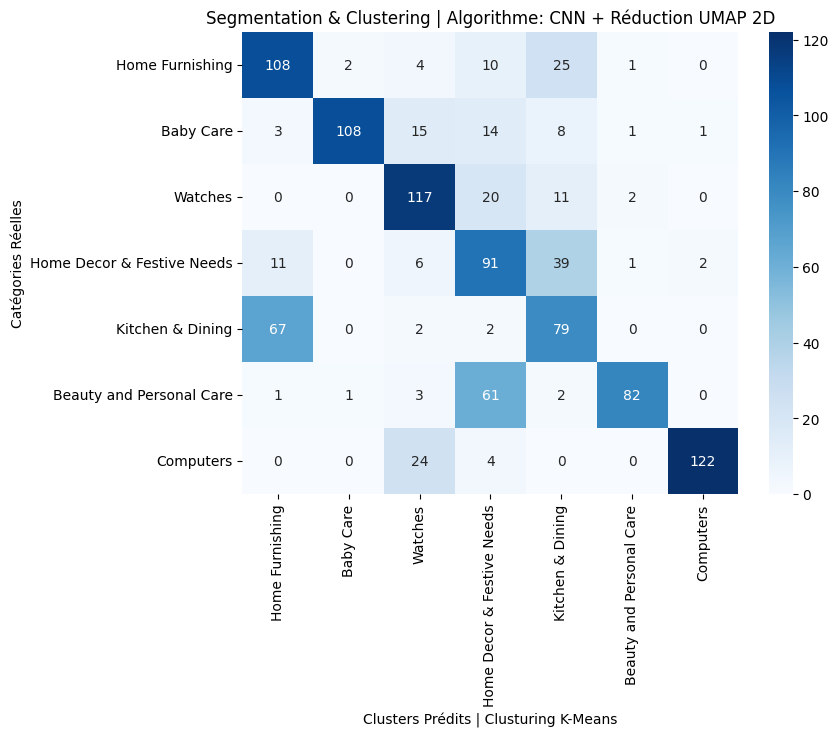

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# On s'assure que les labels réels et les clusters sont bien mappés aux indices numériques
df_umap_cnn["true_label_num"] = df_umap_cnn["true_label"].map({v: k for k, v in category_names.items()}).astype(int)
df_umap_cnn["cluster_num"] = df_umap_cnn["cluster"].map({v: k for k, v in category_names.items()}).astype(int)

# Création de la matrice de confusion 
conf_mat_raw = confusion_matrix(df_umap_cnn["true_label_num"], df_umap_cnn["cluster_num"])

# On trouve la meilleure correspondance entre les clusters K-Means et les vraies catégories
# linear_sum_assignment analyse la matrice de confusion
# Identifie quelle catégorie réelle est majoritaire dans chaque K
# Ré attribue les labels des clusters pour correspondre mieux aux catégories réelles
row_ind, col_ind = linear_sum_assignment(conf_mat_raw, maximize=True)

# Créer un mapping pour réaligner les clusters avec les labels réels
cluster_mapping = {old: new for old, new in zip(col_ind, row_ind)}

# On assigne cluster_num_vf avec cluster_num
# On effectue le mapping avec les catégories
df_umap_cnn["cluster_num_vf"] = df_umap_cnn["cluster_num"].map(cluster_mapping)

# Recalculer la matrice de confusion avec les clusters réalignés
conf_matrix_vf = confusion_matrix(df_umap_cnn["true_label_num"], df_umap_cnn["cluster_num_vf"])

# Affichage de la matrice sous forme de heatmap 
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_vf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=category_names.values(), yticklabels=category_names.values())

plt.xlabel("Clusters Prédits | Clusturing K-Means")
plt.ylabel("Catégories Réelles")
plt.title("Segmentation & Clustering | Algorithme: CNN + Réduction UMAP 2D")
plt.show()

In [85]:
from sklearn.metrics import classification_report

# Création de la matrice de confusion entre catégories réelles et clusters prédits
conf_mat_temp = confusion_matrix(df_umap_cnn["true_label_num"], df_umap_cnn["cluster_num_vf"])

# Trouver la meilleure correspondance entre clusters et catégories réelles
# Pour chaque cluster, on identifie la classe réelle dominante
corresp = np.argmax(conf_mat_temp, axis=0)

# Affichage de la correspondance entre les clusters et les vraies classes
print("La correspondance des clusters : ", corresp)

# Transformation des prédictions après réalignement
# Chaque cluster est remplacé par la classe réelle majoritaire associée
cls_labels_transform = df_umap_cnn["cluster_num_vf"].apply(lambda x: corresp[x])

# Calcul de la nouvelle matrice de confusion après transformation
conf_mat = confusion_matrix(df_umap_cnn["true_label_num"], cls_labels_transform)

# Génération du rapport de classification pour évaluer le clustering K-Means avec les noms des classes
target_names = [category_names[i] for i in sorted(category_names.keys())]

print("\n Rapport de Classification :\n")
print(classification_report(df_umap_cnn["true_label_num"], cls_labels_transform, target_names=target_names))


La correspondance des clusters :  [0 1 2 3 4 5 6]

 Rapport de Classification :

                            precision    recall  f1-score   support

           Home Furnishing       0.57      0.72      0.64       150
                 Baby Care       0.97      0.72      0.83       150
                   Watches       0.68      0.78      0.73       150
Home Decor & Festive Needs       0.45      0.61      0.52       150
          Kitchen & Dining       0.48      0.53      0.50       150
  Beauty and Personal Care       0.94      0.55      0.69       150
                 Computers       0.98      0.81      0.89       150

                  accuracy                           0.67      1050
                 macro avg       0.73      0.67      0.68      1050
              weighted avg       0.73      0.67      0.68      1050



- **Precision** : Précision du modèle (Proportion de vraies prédictions parmi celles faites pour une catégorie).
- **Recall** : Rappel du modèle (Proportion des vraies instances d'une catégorie correctement identifiées).
- **f1-score** : Moyenne harmonique de precision et recall.
- **Support** : Nombre d'instances pour chaque catégorie.
- _La catégorie 0 a une précision de **56%** et un rappel de **70%**._

- L'utilisation de **linear_sum_assignment()** est une approche plus robuste que **np.argmax()** car elle optimise l'affectation des clusters de manière plus globale, ce qui est utile lorsque plusieurs clusters partagent des classes similaires.

## 4. IMAGE_<span style="color:green"> Résultats de l'étude: faisabilité classification produit par l'image</span>

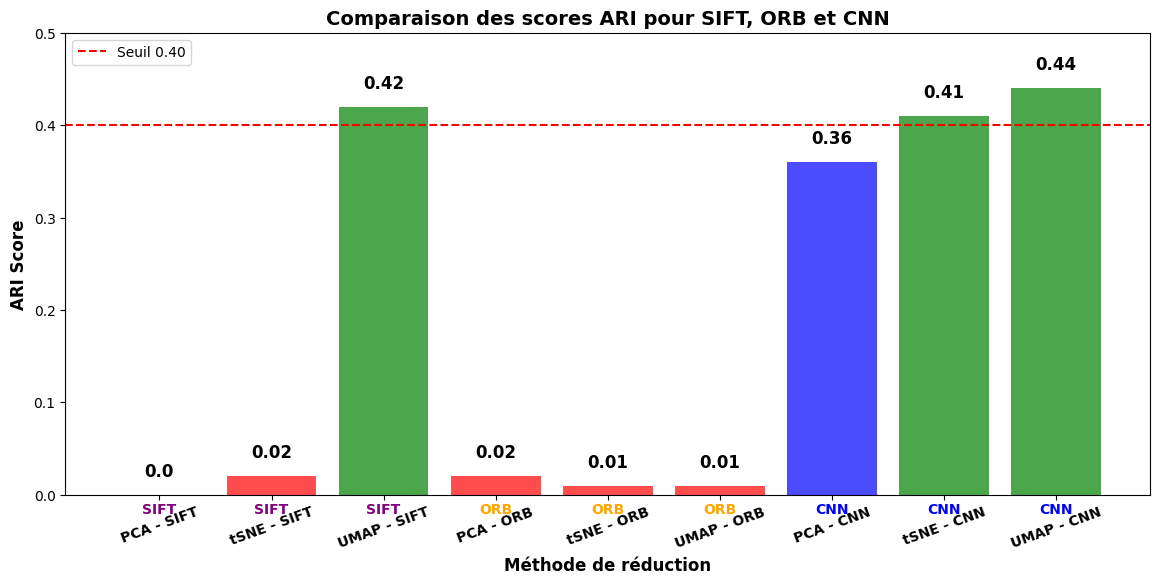

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Données des scores ARI pour SIFT, ORB et CNN
methods = ["PCA - SIFT", "tSNE - SIFT", "UMAP - SIFT", "PCA - ORB", "tSNE - ORB", "UMAP - ORB", "PCA - CNN", "tSNE - CNN", "UMAP - CNN"]
ari_scores = [0.0034, 0.0165, 0.4179, 0.0156, 0.0120, 0.0128, 0.3552, 0.4140, 0.4384] 

# Arrondir les scores à deux chiffres après la virgule
ari_scores = [round(score, 2) for score in ari_scores]

# Seuil de référence
threshold = 0.40

# Création du graphique
plt.figure(figsize=(14, 6))
colors = ["red" if score < 0.30 else "blue" if score >= 0.30 and score < 0.40 else "green" for score in ari_scores]
bar_chart = plt.bar(methods, ari_scores, color=colors, alpha=0.7)

plt.axhline(y=threshold, color='r', linestyle='--', label=f'Seuil {threshold:.2f}')

# Ajout des valeurs sur les barres
for i, score in enumerate(ari_scores):
    plt.text(i, score + 0.02, str(score), ha='center', fontsize=12, fontweight='bold')

# Titre et labels
plt.title("Comparaison des scores ARI pour SIFT, ORB et CNN", fontsize=14, fontweight='bold')
plt.xlabel("Méthode de réduction", fontsize=12, fontweight='bold')
plt.ylabel("ARI Score", fontsize=12, fontweight='bold')
plt.ylim(0, 0.50)  # Plage de l'axe Y
plt.xticks(fontsize=10, fontweight='bold', rotation=20, color='black')


# Coloration spécifique des acronymes
for i, method in enumerate(methods):
    if "SIFT" in method:
        plt.text(i, -0.02, "SIFT", ha='center', fontsize=10, fontweight='bold', color='purple')
    elif "ORB" in method:
        plt.text(i, -0.02, "ORB", ha='center', fontsize=10, fontweight='bold', color='orange')
    elif "CNN" in method:
        plt.text(i, -0.02, "CNN", ha='center', fontsize=10, fontweight='bold', color='blue')  # Réduction de la police et rotation légère
plt.legend()

# Affichage du graphique
plt.show()


## Temps de RUN du notebook

In [87]:
# Calculer le temps d'exécution
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir en format lisible (minutes et secondes)
elapsed_minutes = int(elapsed_time // 60)
elapsed_seconds = int(elapsed_time % 60)

# Afficher l'heure de fin et le temps total d'exécution
end_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"📌 Fin du notebook : {end_datetime}")
print(f"⏳ Temps d'exécution total : {elapsed_minutes} min {elapsed_seconds} sec")


📌 Fin du notebook : 2025-02-25 14:13:11
⏳ Temps d'exécution total : 32 min 31 sec
